In [1]:
import scipy
import nbodypy as npy
import numpy as np
import matplotlib.pyplot as plt
from galpy.orbit import Orbit
from galpy import potential
from galpy.potential import LogarithmicHaloPotential,MWPotential2014,rtide
from galpy.util import bovy_conversion
import math
r0=8.
v0=220.
tfinal=30000.0
dt=1.0

In [2]:
def Edot(epsilon,E,trh):
    return -1.*epsilon*E/trh

def Ndot(xi,ngc,trh):
    return -1.*xi*ngc/trh

def Mdot(xi,mgc,trh):
    return -1.*xi*mgc/trh

def rhdot(mu,rh,trh):
    return mu*rh/trh

def kappadot(lamda,kappa,trh):
    return lamda*kappa/trh

def rcdot(delta,rc,trh):
    return delta*rc/trh

In [3]:
ngc=16000.
mgc=ngc*0.5
rh=3.0

Rp=10.0
Ra=30.0
ecc=0.5
rj0=28.36
Rhj0=0.11
pot=potential.KeplerPotential(1.0e11/bovy_conversion.mass_in_msol(ro=r0,vo=v0))
print(pot._amp*bovy_conversion.mass_in_msol(ro=r0,vo=v0))
print(pot.mass(100.,0.,ro=r0,vo=v0))
rgc=Rp

rv=1.3*rh
rc=0.4*rh
a=rh/1.3
kappa=rh/(4.*rv)

for i in range(0,100):
    vi=130.0+float(i)*150.0/100.

    o=Orbit([rgc/r0,0.0,vi/v0,0.0,0.0,0.0],ro=r0,vo=v0,solarmotion=[-11.1,24.,7.25])

    rperi=o.rperi(analytic=True,pot=pot)
    ecc=o.e(analytic=True,pot=pot)
    rap=o.rap(analytic=True,pot=pot)

    print(vi,rgc,rperi,ecc,rap,(rap-rperi)/(rap+rperi))
    
vi=254.5
o=Orbit([rgc/r0,0.0,vi/v0,0.0,0.0,0.0],ro=r0,vo=v0,solarmotion=[-11.1,24.,7.25])
ts=np.linspace(0.,(tfinal/1000.)/bovy_conversion.time_in_Gyr(ro=r0,vo=v0),tfinal/dt)
o.integrate(ts,pot)
ecc=o.e()
print(ecc,o.rperi())



100000000000.0
100000000000.0
130.0 10.0 2.4450816786563014 0.6070605654843244 10.0 0.6070605654843244
131.5 10.0 2.5161112236922474 0.5979404179583512 10.0 0.5979404179583512
133.0 10.0 2.588785227794337 0.5887156415888884 10.0 0.5887156415888884
134.5 10.0 2.663146948711191 0.5793862363759056 10.0 0.5793862363759056
136.0 10.0 2.7392413415213865 0.5699522023194118 10.0 0.5699522023194118
137.5 10.0 2.8171151395177687 0.5604135394193298 10.0 0.5604135394193298
139.0 10.0 2.8968169398230046 0.5507702476758951 10.0 0.5507702476758951
140.5 10.0 2.9783972940754375 0.5410223270888682 10.0 0.5410223270888682
142.0 10.0 3.06190880451326 0.5311697776583337 10.0 0.5311697776583337
143.5 10.0 3.147406225862321 0.5212125993838931 10.0 0.5212125993838931
145.0 10.0 3.234946573399077 0.5111507922667408 10.0 0.5111507922667408
146.5 10.0 3.324589237708872 0.5009843563056767 10.0 0.5009843563056767
148.0 10.0 3.416396106501728 0.4907132915006726 10.0 0.4907132915006726
149.5 10.0 3.510431694099245 

In [4]:
rh0=rh
rv0=rv
m0=mgc
rc0=rc
n0=ngc
Rp0=Rp
Ra0=Ra
kappa0=kappa

cluster=npy.setup_cluster('king',phi0=7.,N=n0,M=m0,rh=rh0)
cluster.add_orbit(o.x(0.0),o.y(0.0),o.z(0.0),o.vx(0.0),o.vy(0.0),o.vz(0.0),ounits='realkpc',initialize=True)
print(cluster.mtot,cluster.rm,rh0)

cluster.rm=rh0
cluster.rc=rc0


10.0 0.0 0.0
8000.0 3.014697601402861 3.0


In [5]:
sim=npy.simulate(cluster,pot,tfinal=30000.,fast=True,write=True)
print(sim.t[0],sim.t[-1],len(sim.t))

10.0 0.0 0.0
MG =  100021331862.09244
INITIAL:
8000.0 3.014697601402861 1.2058790405611444 -17555.020078448222 0.1923076923076923 28.361551325056144
time: 20.044170141220093
0.0 20604.0 20605


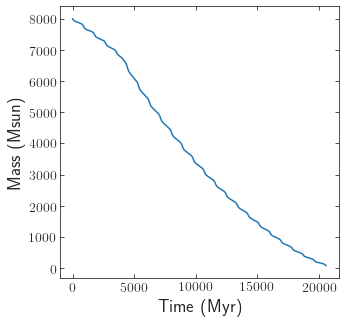

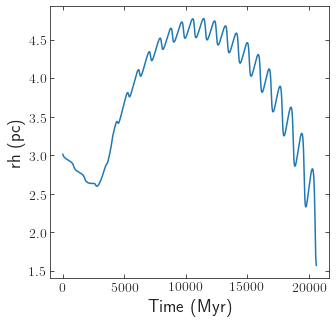

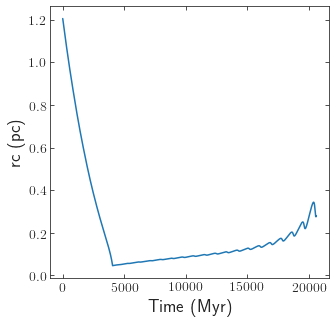

In [6]:
plt.plot(sim.t,sim.m)
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (Msun)')
plt.show()
plt.close()

plt.plot(sim.t,sim.rm)
plt.xlabel('Time (Myr)')
plt.ylabel('rh (pc)')
plt.show()
plt.close()

plt.plot(sim.t,sim.rc)
plt.xlabel('Time (Myr)')
plt.ylabel('rc (pc)')
plt.show()
plt.close()

In [7]:
slow_sim=npy.simulate(cluster,pot,tfinal=30000.,fast=False,write=False)

10.0 0.0 0.0
0.0 30.0 30000
INITIAL:
8000.0 3.014697601402861 1.2058790405611444 -17555.020078448222 0.1923076923076923 29.87603164371444
time: 14.504326820373535


In [12]:
print(slow_sim.t[0],slow_sim.t[-1],len(slow_sim.t))

0.0 20480.0 20481


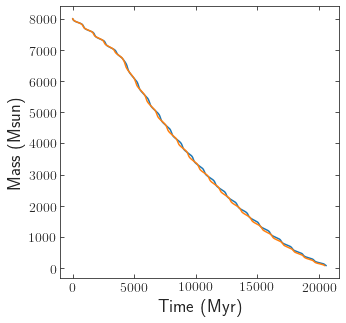

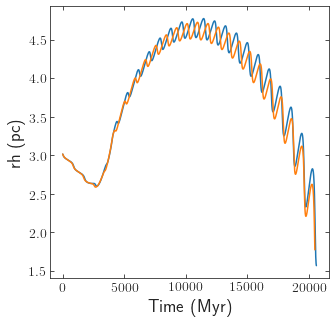

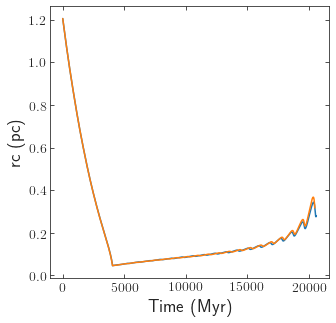

In [8]:
plt.plot(sim.t,sim.m)
plt.plot(slow_sim.t,slow_sim.m)
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (Msun)')
plt.show()
plt.close()

plt.plot(sim.t,sim.rm)
plt.plot(slow_sim.t,slow_sim.rm)
plt.xlabel('Time (Myr)')
plt.ylabel('rh (pc)')
plt.show()
plt.close()

plt.plot(sim.t,sim.rc)
plt.plot(slow_sim.t,slow_sim.rc)
plt.xlabel('Time (Myr)')
plt.ylabel('rc (pc)')
plt.show()
plt.close()

In [9]:
grav=4.302e-3 #(pc km/s^2 / Msun)
multimass=False

rh=rh0
rv=rv0
mgc=m0
rc=rc0
ngc=n0
kappa=kappa0

E=-kappa*grav*(mgc**2.)/rh #Msun km/s^2

ctime=[0.]
cmass=[mgc]
crh=[rh]
crc=[rc]
cenergy=[E]
ckappa=[kappa]

for i in range(0,len(ts)):
    t=ts[i]
    rgc=o.r(t) # kpc
    rj=rtide(pot,rgc/r0,0.0,M=mgc/bovy_conversion.mass_in_msol(ro=r0,vo=v0))*r0*1000.0 # pc
    Rhj=rh/rj
    rv=rh/(4.*kappa)
    Rvj=rv/rj
    Rch=rc/rh
    
    if i==0:
        print('INITIAL:')
        print(mgc,rh,rc,E,kappa,rj)
   

    #Core collapse criteria:
    n2=12.
    n3=15000.
    Rch_min=(n2/ngc+n2/n3)**(2./3.) 
        
    E=-kappa*grav*(mgc**2.)/rh #Msun km/s^2
    
    if multimass:
        lnlambda=np.log(0.02*ngc)
    else:
        lnlambda=np.log(0.11*ngc)

    mbar=mgc/ngc #Msun
    trh=0.138*np.sqrt(ngc)*(rh**(3./2.))/(np.sqrt(grav*mbar)*lnlambda) # pc s /km
    #trh*=3.086e13/(3600.0*24.0*365.0*1000000.0) #Myr
     
    #Constants for rho
    pc0=0.055*m0*(rv0**(-0.8))
    alpha=2.2
    ph=3.0*mgc/(8.0*np.pi*(rh**3.))
    
    if Rch> Rch_min:
        pc=pc0*(rc**(-alpha))
    else:
        pc=ph*(Rch**(-2.))
    
    #Constants for epsilon
    zeta=0.1 #Alexander & Gieles (2012)
    xi_1=0.0142
    f=0.3
    if Rch > Rch_min:
        F=Rch_min/Rch
    else:
        F=1.
        
    z=1.61
    x=0.75
    Rvj1=0.145
    
    #if ecc>0.:
    #    n1=2025.
    #else:
    #    n1=15000.
    n1=15000.

    if multimass:
        lnlambda1=np.log(0.02*n1)
    else:
        lnlambda1=np.log(0.11*n1)

    
        
    #Constants for xi
    c=0.5
    q=((1.0-ecc**2.)*(1.0-c*(ecc**2.)))**(-1.)    
    P=((Rvj/Rvj1)**z)*((ngc*lnlambda1/(n1*lnlambda))**(1.-x))*q
    xi=F*xi_1*(1.0-P)+(3./5.)*zeta*(f + (1.-f)*F)*P
    
    #Constants for delta
    d1=-0.09
    d2=-0.002
    sigmac2=(8./3.)*np.pi*grav*pc*(rc**2.) #km/s^2
    trc=((np.sqrt(sigmac2))**3.)/(15.4*(grav**2.)*mbar*pc*lnlambda)
    #trc*=3.086e13/(3600.0*24.0*365.0*1000000.0) #Myr

    #Constants for mu
    if Rch>Rch_min:
        kappa0=rh0/(4.*rv0)
        kappa1=0.295
        Rch0=0.1
    else:
        kappa0=0.2
        kappa1=0.265
        Rch0=0.220
        
    kappa_rch=kappa1+(kappa0-kappa1)*math.erf(Rch/Rch0)
    k=(2.0*(kappa0-kappa1)*Rch*np.exp(-(Rch/Rch0)**2.))/(np.sqrt(np.pi)*kappa*Rch0)
    
    if Rch > Rch_min:
        #UE
        epsilon=(Rhj/kappa)*xi
        delta=d1+d2*(trh/trc)
        mu=((Rhj/kappa-2.)*xi+k*delta)/(1.+k)
        lamda=k*(delta-mu)
    else:
        #BE
        epsilon=zeta
        mu=zeta+((2./3.)*k*((1.+ngc/n3)**(-1.))-2.)*xi
        delta=(2./3.)*xi*((1.0+ngc/n3)**(-1.))+mu
        lamda=k*(delta-mu)+(kappa_rch-kappa)/kappa_rch
    
    #print('DELTA:',d1,d2,trh,trc,trh/trc,delta)
    
    #print('Xi,Pc,Epsilon,Mu,Delta,Lamda')
    #print(xi,pc,epsilon,mu,delta,lamda)

    dE=-1.*epsilon*E/trh
    dN=-1.*xi*ngc/trh
    dM=-1.*xi*mgc/trh
    drh=mu*rh/trh
    dkappa=lamda*kappa/trh
    drc=delta*rc/trh
    
    rat=epsilon/(-1.0*lamda+mu+2.0*xi)
    
    #E=Runge_Kutta(E,dE,dt)
    
    E=E+dE*dt
    mgc=mgc+dM*dt
    ngc=ngc+dN*dt
    rh=rh+drh*dt
    kappa=kappa+dkappa*dt
    rc=rc+drc*dt
        
    ctime.append(t*1000.0*bovy_conversion.time_in_Gyr(ro=r0,vo=v0))
    cmass.append(mgc)
    crh.append(rh)
    crc.append(rc)
    ckappa.append(kappa)
    cenergy.append(E)
        
    print(ctime[-1],cmass[-1],crh[-1],crc[-1],rat,Rch,Rch_min)
    if ctime[-1] >30000. or cmass[-1] < 0.01*m0 :
        break

INITIAL:
8000.0 3.0 1.2000000000000002 -17649.23076923077 0.1923076923076923 29.87603164371444
0.0 7999.221673532661 2.999568658761633 1.199565604171156 0.9999999999999999 0.4000000000000001 0.013393306228327474
1.0000333344444814 7998.443507127678 2.999137391978726 1.1991312472520483 0.9999999999999999 0.3999127010036152 0.013393726603215058
2.000066668888963 7997.665780176668 2.9987063199121415 1.1986969292784828 1.0000000000000002 0.3998253799439656 0.013394146966843995
3.0001000033334444 7996.888770810945 2.9982755623830672 1.1982626503162566 0.9999999999999999 0.3997380207987834 0.013394567168221143
4.000133337777926 7996.112755099482 2.9978452384862475 1.1978284104610375 1.0000000000000002 0.3996506076192217 0.013394987056926521
5.000166672222408 7995.338006262481 2.9974154663077446 1.1973942098381685 1.0000000000000002 0.39956312456805715 0.013395406483547583
6.000200006666889 7994.5647939063965 2.996986362648994 1.1969600486023992 1.0000000000000002 0.3994755559572575 0.0133958

88.00293343111437 7947.170781662956 2.969322017143973 1.1615416934181915 1.0 0.39129340437495014 0.013421798870149772
89.00296676555887 7946.78592773069 2.969081953562679 1.1611127058011639 1.0000000000000004 0.3911807768614515 0.0134220110723771
90.00300010000335 7946.404358004059 2.9688436827259834 1.160683804580952 1.0 0.3910679206439264 0.013422221470258008
91.00303343444781 7946.026022273727 2.9686071807550407 1.1602549901816994 1.0000000000000002 0.39095483919692786 0.01342243009117006
92.0030667688923 7945.650871079575 2.9683724240297766 1.159826263021376 0.9999999999999998 0.3908415359578151 0.013422636962095535
93.00310010333678 7945.278855710536 2.9681393891936128 1.159397623511849 1.0000000000000004 0.390728014326056 0.013422842109620484
94.00313343778127 7944.909928203359 2.967908053157524 1.1589690720589545 1.0000000000000007 0.39061427766262535 0.013423045559934451
95.00316677222574 7944.544041340398 2.9676783931034745 1.1585406090625694 0.9999999999999997 0.3905003292894

151.0050335011167 7927.751617169563 2.9569106112610744 1.1346978775797818 1.0000000000000002 0.38386615590199297 0.013432512883367293
152.0050668355612 7927.501675302253 2.9567473078338775 1.1342749584944003 0.9999999999999998 0.38374439635016616 0.013432650863617506
153.00510017000565 7927.253049798843 2.956584786579855 1.1338521432317985 1.0000000000000007 0.38362255559991487 0.013432788119400369
154.00513350445016 7927.005723460248 2.956423037949476 1.1334294319569957 0.9999999999999996 0.3835006350497482 0.013432924660192079
155.00516683889464 7926.75967936791 2.956262052535205 1.1330068248325753 0.9999999999999996 0.3833786360774413 0.013433060495314564
156.00520017333912 7926.5149008783455 2.9561018210690637 1.1325843220187217 1.000000000000001 0.3832565600403866 0.01343319563393846
157.0052335077836 7926.271371617796 2.955942334420238 1.1321619236732559 1.0 0.3831344082759391 0.013433330085086043
158.00526684222808 7926.02907547699 2.9557835835927166 1.1317396299516704 0.9999999

219.00730024334143 7913.074196003544 2.94720332361197 1.1061824942749694 0.9999999999999994 0.3754578424536455 0.013440619999891308
220.00733357778594 7912.885157564261 2.9470769503028444 1.105766913088839 0.9999999999999993 0.37533294205140827 0.01344072448474656
221.00736691223042 7912.69670319148 2.946950938817592 1.105351442805486 1.0000000000000004 0.3752080219606106 0.013440828648790723
222.0074002466749 7912.508826481902 2.946825285340557 1.1049360834829431 1.0000000000000022 0.37508308273669033 0.013440932495554543
223.0074335811194 7912.321521112014 2.946699986100866 1.1045208351782765 0.9999999999999991 0.3749581249284172 0.013441036028524795
224.00746691556387 7912.134780836735 2.9465750373717134 1.104105697947597 1.0000000000000004 0.37483314907799664 0.013441139251145028
225.00750025000835 7911.948599488105 2.946450435469662 1.1036906718460713 1.0000000000000007 0.37470815572117155 0.01344124216681628
226.00753358445283 7911.76297097398 2.9463261767539564 1.103275756927934

358.01193373112443 7890.405458796368 2.9318990968679013 1.049494824595353 0.9999999999999991 0.3580815436923903 0.013453166390878624
359.01196706556885 7890.258026529449 2.9317989235851027 1.049094911980746 1.000000000000003 0.35795734775337623 0.013453248116337508
360.0120004000134 7890.11070253929 2.931698820039059 1.0486951123111268 1.0000000000000002 0.3578331731897484 0.013453329783557719
361.0120337344578 7889.963484906668 2.9315987850150464 1.0482954255723027 1.0000000000000002 0.3577090201568369 0.013453411393601174
362.0120670689023 7889.8163717210255 2.931498817303604 1.0478958517498 0.9999999999999988 0.3575848888090334 0.01345349294752506
363.0121004033468 7889.669361080311 2.9313989157004343 1.0474963908288657 1.0000000000000013 0.357460779299804 0.013453574446381898
364.01213373779126 7889.522451090817 2.9312990790063096 1.047097042794469 0.9999999999999992 0.3573366917817034 0.013453655891219657
365.0121670722358 7889.375639867019 2.931199306026974 1.046697807631303 1.00

523.0174339144638 7866.258939603987 2.9154984268513333 0.9850195843990625 0.9999999999999994 0.3379752621431588 0.0134665758560808
524.0174672489084 7866.105734297934 2.9153947695793345 0.984637937115155 1.0000000000000002 0.3378563251234059 0.01346666109315085
525.0175005833528 7865.952339470524 2.915290993824914 0.984256397219115 0.9999999999999989 0.33773743006928336 0.013466746437569921
526.0175339177973 7865.798752819929 2.9151870981563457 0.9838749646580147 0.9999999999999999 0.33761857711766635 0.013466831890623334
527.0175672522417 7865.644972029059 2.915083081132939 0.9834936393786609 0.999999999999998 0.33749976640615886 0.013466917453604973
528.0176005866863 7865.490994765321 2.9149789413049008 0.9831124213275927 1.0000000000000007 0.3373809980731077 0.013467003127817423
529.0176339211307 7865.336818680376 2.9148746772131937 0.9827313104510806 0.9999999999999994 0.3372622722576167 0.01346708891457211
530.0176672555751 7865.182441409891 2.9147702873893953 0.9823503066951249 0

607.0202340078004 7852.47122348403 2.9062193146271134 0.9533299531487354 1.0000000000000013 0.3281458060944715 0.013474254034471887
608.0202673422448 7852.292028642306 2.9060995228102766 0.952957112824769 1.0 0.3280309742456769 0.01347435391641204
609.0203006766892 7852.1123663020235 2.9059794431740213 0.9525843743136163 1.0000000000000013 0.32791620016620554 0.013474454061099825
610.0203340111337 7851.932231576525 2.9058590728000984 0.9522117375315794 0.9999999999999992 0.32780148412652477 0.013474554471268607
611.0203673455783 7851.751619523606 2.905738408738942 0.9518392023944339 1.0000000000000004 0.3276868264000236 0.013474655149682848
612.0204006800226 7851.570525144613 2.9056174480091834 0.9514667688174233 1.0000000000000002 0.32757222726305957 0.013474756099138603
613.0204340144671 7851.388943383521 2.905496187597155 0.9510944367152536 1.0000000000000007 0.3274576869950074 0.013474857322464043
614.0204673489117 7851.206869125991 2.905374624456388 0.9507222060020869 0.9999999999

700.023334111137 7832.945427836276 2.8933434956101762 0.9190785767404963 0.9999999999999999 0.31776049578685356 0.013485148612034675
701.0233674455816 7832.690742177922 2.8931783588991826 0.9187147557253376 0.999999999999999 0.3176527702759579 0.013485290840429208
702.0234007800261 7832.434702567315 2.8930124290442363 0.9183510253680292 0.9999999999999996 0.31754514992117416 0.013485433827605876
703.0234341144704 7832.177291194955 2.8928456963094034 0.9179873854927153 0.9999999999999998 0.3174376356452172 0.013485577583535755
704.023467448915 7831.918489953907 2.892678150810817 0.9176238359217425 0.9999999999999998 0.31733022838509956 0.013485722118356799
705.0235007833595 7831.658280433911 2.8925097825141113 0.9172603764756312 1.0000000000000013 0.31722292909238203 0.013485867442377158
706.0235341178039 7831.3966439153755 2.8923405812318177 0.9168970069730473 1.0000000000000016 0.3171157387334286 0.01348601356607858
707.0235674522485 7831.133561363248 2.8921705366207227 0.916533727230

767.0255675189173 7811.738120706473 2.8799183630880885 0.8948928832955618 1.0000000000000002 0.31083324455665395 0.01349700019460626
768.0256008533618 7811.333485252043 2.8796692854884856 0.8945346343853036 0.9999999999999998 0.31073550374392667 0.01349722650237562
769.0256341878063 7810.925283536192 2.8794183017715196 0.8941764585913066 0.9999999999999986 0.31063797460810205 0.013497454813443341
770.0256675222508 7810.51346103019 2.8791653868468683 0.8938183555281333 1.0000000000000007 0.31054065956348814 0.013497685158746065
771.0257008566952 7810.097962500443 2.8789105154195873 0.8934603248055405 1.0000000000000002 0.3104435610442659 0.013497917569641133
772.0257341911397 7809.6787320212925 2.878653662001807 0.8931023660284365 1.0000000000000004 0.3103466815033405 0.013498152077900992
773.0257675255842 7809.255712990059 2.8783948009256073 0.8927444787968407 1.0000000000000007 0.31025002341107466 0.013498388715706437
774.0258008600288 7808.828848144495 2.878133906357146 0.89238666270

860.0286676222541 7754.035550331599 2.8468588388270586 0.861827701365008 0.9999999999999996 0.3028078610998495 0.013529560244936385
861.0287009566987 7753.259252631301 2.84643064939307 0.8614742749007965 1.0000000000000007 0.3027293414098789 0.013530005368602981
862.0287342911431 7752.485245181831 2.846003464857353 0.8611208860510239 1.0 0.30265071628725065 0.013530449410193227
863.0287676255875 7751.713776933746 2.8455773952121013 0.8607675350355317 1.0000000000000002 0.3025719738869625 0.013530892223041291
864.0288009600321 7750.945089943626 2.8451525479016513 0.8604142220965602 0.9999999999999991 0.3024931026243876 0.013531333663984521
865.0288342944765 7750.179418833572 2.8447290276111863 0.8600609474982008 1.0000000000000007 0.3024140911991276 0.013531773593704067
866.028867628921 7749.416990300749 2.8443069360714697 0.8597077115258056 1.0 0.30233492861723377 0.013532211877038694
867.0289009633655 7748.658022678888 2.8438863718803735 0.8593545144853549 1.0000000000000002 0.3022556

928.0309343644788 7712.2476926366335 2.8228687261317216 0.8379022974245014 1.0 0.29692220799534375 0.01355376836099733
929.0309676989234 7711.808088801432 2.8226022405168294 0.8375524891579232 0.9999999999999997 0.29682651894787504 0.01355402463341652
930.0310010333678 7711.372492042007 2.8223378680576467 0.8372027515213869 1.0000000000000002 0.2967306116091526 0.013554278583354866
931.0310343678123 7710.940843000609 2.8220755821927392 0.8368530849296066 1.0000000000000004 0.2966344890867215 0.013554530244701721
932.0310677022568 7710.513082915606 2.8218153564814155 0.8365034897915473 0.9999999999999988 0.29653815447401155 0.013554779651039676
933.0311010367013 7710.089153647426 2.8215571646222237 0.8361539665104569 0.999999999999999 0.29644161084820314 0.013555026835627195
934.0311343711458 7709.668997701481 2.8213009804699354 0.8358045154839027 1.0000000000000007 0.29634486126826676 0.013555271831383147
935.0311677055903 7709.252558248276 2.8210467780511004 0.8354551371038098 1.00000

1064.0354678489284 7673.39408849835 2.798274791838031 0.7910872272252426 1.0000000000000004 0.2828128600508922 0.013576454987939069
1065.0355011833728 7673.192930549142 2.7981433801974647 0.7907491754923672 0.9999999999999998 0.2827053402806168 0.013576572640515119
1066.0355345178173 7672.992407839677 2.798012358453298 0.7904112182931377 1.0000000000000007 0.2825978043471683 0.01357668992418795
1067.035567852262 7672.792513258276 2.797881722465895 0.7900733556754517 1.0000000000000002 0.2824902527342895 0.013576806843105067
1068.0356011867063 7672.593239785027 2.7977514681463465 0.7897355876863339 1.0 0.2823826859196627 0.013576923401360498
1069.0356345211505 7672.394580490207 2.797621591455649 0.7893979143719467 1.0000000000000004 0.2822751043750052 0.013577039602995708
1070.0356678555952 7672.196528532727 2.7974920884038967 0.789060335777601 1.0000000000000002 0.28216750856616385 0.013577155452000502
1071.0357011900396 7671.999077158618 2.7973629550494907 0.7887228519477667 0.9999999

1141.0380346011536 7659.342384647273 2.7890494699862747 0.7653363506286127 0.9999999999999986 0.274515282539544 0.01358468054123929
1142.038067935598 7659.17438877113 2.788938803677452 0.7650056661114885 0.9999999999999976 0.27440759257395997 0.013584778976677704
1143.0381012700425 7659.006664997917 2.788828312371871 0.764675077868738 0.9999999999999978 0.274299911171505 0.013584877255082126
1144.038134604487 7658.839210247453 2.788717994218016 0.7643445859033065 1.0000000000000007 0.2741922385384812 0.01358497537825125
1145.0381679389313 7658.672021466262 2.788607847380047 0.7640141902177584 1.0000000000000022 0.27408457487923094 0.01358507334796823
1146.0382012733758 7658.505095627178 2.7884978700375735 0.7636838908142813 0.9999999999999997 0.27397692039616295 0.013585171166000904
1147.0382346078202 7658.338429728945 2.788388060385434 0.7633536876946891 0.9999999999999976 0.27386927528977856 0.013585268834102042
1148.0382679422648 7658.17202079583 2.7882784166334735 0.763023580860425

1264.0421347378247 7639.963763792965 2.776294390237098 0.7253825228705362 0.9999999999999996 0.26138273940282347 0.013596052232347776
1265.0421680722693 7639.8115187373205 2.776194567152032 0.7250636104506397 0.999999999999997 0.26127723537581615 0.013596141714708004
1266.0422014067137 7639.659283449335 2.7760947609939945 0.7247447925384872 0.9999999999999987 0.26117175612602994 0.013596231193618968
1267.0422347411582 7639.507056262189 2.775994970764965 0.7244260691061868 1.000000000000002 0.26106630174215983 0.013596320670060742
1268.0422680756026 7639.354835510525 2.7758951954679922 0.7241074401256693 1.0000000000000002 0.2609608723125895 0.0135964101450126
1269.0423014100468 7639.2026195303315 2.7757954341071227 0.7237889055686885 1.0000000000000002 0.2608554679253987 0.013596499619453112
1270.0423347444914 7639.050406658821 2.7756956856873307 0.7234704654068218 0.9999999999999997 0.26075008866836985 0.01359658909436019
1271.042368078936 7638.898195234313 2.775595949214448 0.7231521

1331.044368145605 7629.705071175552 2.769595999387399 0.7042228786895278 1.0 0.25437282850683973 0.01360208694352647
1332.0444014800494 7629.549774415223 2.76949510099515 0.7039102283740163 0.999999999999998 0.2542691709712512 0.013602178377512306
1333.044434814494 7629.3943732698335 2.7693941516337626 0.7035976703190088 1.0000000000000013 0.25416554379210976 0.013602269875335686
1334.0444681489382 7629.23886590351 2.7692931502182856 0.7032852044852047 0.9999999999999999 0.2540619470521854 0.013602361438081287
1335.0445014833826 7629.083250473423 2.7691920956598497 0.7029728308331311 1.0000000000000018 0.25395838083439065 0.01360245306683796
1336.0445348178273 7628.927525129639 2.769090986865579 0.7026605493231423 1.0000000000000007 0.2538548452217884 0.013602544762698822
1337.044568152272 7628.771688014975 2.7689898227385026 0.702348359915419 0.9999999999999997 0.25375134029759916 0.013602636526761348
1338.0446014867164 7628.615737264837 2.7688886021774675 0.7020362625699685 1.0000000

1425.047501583386 7614.3740662542 2.7597258096375685 0.6752311931440461 1.0000000000000029 0.2447736872958508 0.013611124556975124
1426.0475349178305 7614.199448565242 2.759614530947566 0.6749270184358801 0.9999999999999997 0.24467328992829307 0.01361122761956317
1427.0475682522751 7614.024497688621 2.759503067168248 0.6746229314414696 0.9999999999999998 0.2445729325117487 0.013611330881507556
1428.0476015867196 7613.849210194166 2.759391416302878 0.6743189321014018 1.0000000000000002 0.24447261518493452 0.01361143434484293
1429.047634921164 7613.673582619353 2.759279576336286 0.6740150203559746 0.9999999999999997 0.24437233808782236 0.013611538011623165
1430.0476682556086 7613.49761146881 2.7591675452345923 0.6737111961451937 1.000000000000002 0.24427210136165967 0.013611641883921673
1431.0477015900533 7613.32129321381 2.7590553209449253 0.6734074594087701 0.9999999999999997 0.24417190514899045 0.013611745963831683
1432.0477349244977 7613.144624291761 2.7589429013951374 0.673103810086

1557.0519017300578 7586.531113195276 2.742337627529968 0.6358115857136379 1.0000000000000004 0.23194326713771585 0.013627587617021764
1558.0519350645022 7586.260447064246 2.7421722173163627 0.6355183173751147 1.0 0.23185022126043445 0.013627747901500497
1559.0519683989467 7585.988338791683 2.7420059996909676 0.6352251246336217 0.999999999999999 0.23175725921294144 0.013627909043810577
1560.0520017333913 7585.714769220499 2.7418389643152414 0.6349320073399802 1.0 0.2316643817355664 0.013628071055336834
1561.052035067836 7585.439718869951 2.741671100689692 0.6346389653435063 0.9999999999999989 0.23157158958040808 0.01362823394765695
1562.0520684022802 7585.163167929234 2.741502398151081 0.6343459984919873 0.9999999999999996 0.23147888351154053 0.013628397732545315
1563.0521017367246 7584.885096250952 2.7413328458695903 0.6340531066316571 0.9999999999999998 0.23138626430522247 0.013628562421976933
1564.052135071169 7584.605483344469 2.741162432845946 0.6337602896071719 0.9999999999999996 

1644.0548018267275 7554.552592301508 2.7233648172206952 0.6105597665104343 0.999999999999999 0.2242744588728816 0.01364655134850541
1645.054835161172 7554.033581404538 2.723067460075259 0.6102722874115132 0.9999999999999999 0.22419316084634427 0.013646859724845318
1646.0548684956166 7553.509519799074 2.7227675775960525 0.6099848618227975 0.9999999999999997 0.22411207080218523 0.01364717113298936
1647.0549018300612 7552.980345860227 2.722465145404611 0.6096974893397896 1.0000000000000002 0.2240311904849979 0.013647485611389627
1648.0549351645057 7552.44599864186 2.7221601396852844 0.6094101695543213 1.0 0.22395052159581524 0.013647803198197635
1649.05496849895 7551.906418012513 2.72185253725117 0.6091229020546398 0.9999999999999991 0.2238700657870836 0.013648123931188265
1650.0550018333945 7551.361544800443 2.721542315613576 0.608835686425504 0.9999999999999994 0.2237898246573637 0.013648447847678373
1651.0550351678392 7550.811320948072 2.7212294530550736 0.6085485222482913 0.9999999999

1771.0590353011767 7468.631582180838 2.676277289459993 0.5743812576388457 0.9999999999999994 0.21470218795570067 0.013698645071512838
1772.0590686356213 7468.1341568766675 2.675996267162254 0.5740991126736995 1.000000000000001 0.21461948651619045 0.013698952707934899
1773.0591019700657 7467.641389031503 2.675717700004026 0.5738170240174726 0.9999999999999998 0.21453658950073942 0.013699257489446715
1774.0591353045102 7467.153215130414 2.67544156131103 0.5735349920458848 1.0 0.2144534993421052 0.01369955945394029
1775.0591686389546 7466.669571769363 2.6751678242474357 0.5732530171299687 1.0 0.2143702184864165 0.013699858639315261
1776.0592019733992 7466.190395726235 2.674896461855277 0.5729710996360519 0.9999999999999992 0.21428674938972594 0.013700155083431179
1777.059235307844 7465.715624026084 2.6746274470913 0.5726892399257449 0.9999999999999992 0.21420309451478572 0.01370044882406352
1778.0592686422883 7465.245194000935 2.6743607528613564 0.5724074383559354 0.9999999999999998 0.214

1860.0620020667357 7436.750943354044 2.6581920450345224 0.5495231124945031 0.999999999999999 0.2068204518102726 0.01371839695299813
1861.0620354011803 7436.484807558607 2.6580437927088316 0.5492469869255263 1.0000000000000013 0.20672814574139106 0.01371856208043441
1862.0620687356245 7436.2199394049985 2.6578963611153106 0.5489709363606241 1.0000000000000007 0.20663579299639181 0.013718726425531883
1863.062102070069 7435.956322330481 2.657749741395346 0.5486949608952169 1.0000000000000009 0.2065433943896383 0.013718889998532937
1864.0621354045136 7435.693940039841 2.657603924826951 0.5484190606232057 1.0000000000000004 0.20645095072312805 0.013719052809514876
1865.062168738958 7435.432776500196 2.657458902822389 0.5481432356369953 1.0000000000000009 0.2063584627867058 0.013719214868393115
1866.0622020734027 7435.172815935908 2.6573146669258363 0.5478674860275168 1.0000000000000002 0.20626593135827334 0.013719376184924307
1867.062235407847 7434.914042823601 2.657171208811085 0.547591811

1958.065268842295 7414.877454424903 2.6465848160696246 0.5228295443497568 0.9999999999999996 0.19764307846683024 0.013731985311555237
1959.0653021767394 7414.684213602312 2.646489320954489 0.5225610533862749 1.0000000000000002 0.19754875837540609 0.013732105532768537
1960.065335511184 7414.491373272102 2.646394179876194 0.5222926419788329 0.9999999999999991 0.19745443491825873 0.013732225508309492
1961.0653688456284 7414.298929020781 2.646299390525272 0.5220243101413424 0.9999999999999996 0.19736010831283918 0.013732345240912465
1962.0654021800726 7414.106876481799 2.6462049506194587 0.5217560578872956 0.9999999999999999 0.19726577877408052 0.013732464733282802
1963.065435514517 7413.915211334808 2.646110857903289 0.5214878852297695 1.0000000000000009 0.19717144651443422 0.013732583988097298
1964.0654688489617 7413.723929304938 2.646017110147703 0.5212197921814307 1.0000000000000004 0.19707711174390602 0.01373270300800463
1965.0655021834064 7413.533026162087 2.645923705149656 0.5209517

2049.0683022767425 7398.49443924002 2.639121554364349 0.4987233932069645 0.9999999999999994 0.18906722244959515 0.013742191013647554
2050.068335611187 7398.323764580639 2.6390512899571448 0.4984621575683863 1.0 0.18897325603749449 0.013742297484626591
2051.0683689456314 7398.153216672028 2.638981245130639 0.4982010014515615 1.0000000000000007 0.18887929896068098 0.01374240387977827
2052.068402280076 7397.982793415649 2.6389114189602045 0.4979399248450512 1.0 0.18878535130585922 0.013742510200408222
2053.0684356145207 7397.8124927244135 2.638841810528438 0.49767892773723266 0.9999999999999961 0.18869141315901072 0.013742616447815048
2054.0684689489653 7397.642312522486 2.6387724189250465 0.4974180101163008 0.9999999999999986 0.18859748460540368 0.013742722623290436
2055.0685022834095 7397.472250745098 2.638703243246737 0.49715717197026943 0.9999999999999996 0.18850356572960292 0.013742828728119282
2056.068535617854 7397.302305338358 2.638634282597104 0.4968964132869722 1.000000000000000

2123.070769025634 7386.081233332148 2.6344618011270327 0.47960580882085235 1.0000000000000013 0.18214385201557343 0.013749943325239383
2124.0708023600787 7385.914818342888 2.6344056410191716 0.47935041619444674 1.0000000000000009 0.18205077356432922 0.013750047376210236
2125.0708356945233 7385.748395136681 2.6343496452452784 0.47909510181163506 0.9999999999999994 0.18195770944713002 0.013750151435567544
2126.070869028968 7385.58196204068 2.634293813161964 0.47883986564983794 1.0 0.18186465971832969 0.013750255504358759
2127.070902363412 7385.415517382854 2.634238144126603 0.4785847076863475 0.9999999999999996 0.1817716244320836 0.013750359583630934
2128.070935697857 7385.249059491869 2.6341826374972577 0.47832962789832745 1.0000000000000009 0.18167860364235408 0.013750463674430774
2129.070969032301 7385.082586696972 2.634127292632605 0.47807462626281366 0.9999999999999988 0.1815855974029156 0.013750567777804722
2130.0710023667457 7384.91609732787 2.6340721088918615 0.4778197027567142 1

2214.073802460082 7370.697199506707 2.6299445028374655 0.45668240790104364 0.9999999999999991 0.17373872693757517 0.013759575952490067
2215.0738357945265 7370.522962008536 2.629900548555122 0.4564340276941947 0.9999999999999993 0.17364716533308053 0.013759685208911873
2216.073869128971 7370.348552430432 2.629856693597184 0.4561857231592899 0.9999999999999999 0.17355562283332784 0.013759794576751173
2217.0739024634154 7370.173968649474 2.629812937052801 0.4559374942620515 1.0000000000000009 0.17346409949635228 0.01375990405734735
2218.07393579786 7369.999208530708 2.6297692780035877 0.4556893409680585 0.9999999999999994 0.17337259538049693 0.01376001365204745
2219.0739691323047 7369.824269926951 2.629725715523492 0.4554412632427461 1.0000000000000009 0.17328111054441972 0.013760123362206327
2220.0740024667493 7369.649150678587 2.6296822486786637 0.4551932610514047 0.9999999999999996 0.17318964504710055 0.013760233189186758
2221.0740358011935 7369.47384861336 2.6296388765273204 0.4549453

2284.076135871196 7357.954964177702 2.6270489904860987 0.43947652313908037 0.9999999999999998 0.16737910723035293 0.013767575096843425
2285.07616920564 7357.762676260921 2.6270092348011005 0.4392333485270941 0.9999999999999974 0.16728904741809225 0.013767695945820932
2286.076202540085 7357.570024789471 2.6269694875633522 0.4389902467892779 0.9999999999999997 0.1671990119822894 0.013767817027238494
2287.0762358745296 7357.377006130446 2.6269297469048265 0.43874721787874166 1.0000000000000004 0.16710900102477538 0.01376793834339495
2288.076269208974 7357.183616615626 2.626890010935087 0.4385042617483597 0.9999999999999999 0.16701901464844823 0.01376805989661154
2289.0763025434185 7356.989852540939 2.6268502777409464 0.4382613783507685 0.9999999999999999 0.16692905295729019 0.013768181689232245
2290.0763358778627 7356.795710165899 2.6268105453861175 0.43801856763836433 0.9999999999999989 0.16683911605638485 0.013768303723624148
2291.0763692123073 7356.601185713047 2.6267708119108604 0.437

2379.0793026434217 7337.40672677455 2.622953854753769 0.4166929120513756 1.0000000000000016 0.15895105455646086 0.013780509920056224
2380.079335977866 7337.156296435241 2.622901924208398 0.4164564088470122 0.9999999999999979 0.15886398889411374 0.013780667796615458
2381.0793693123105 7336.904878854963 2.6228496507992594 0.4162199725504387 0.9999999999999992 0.15877696569714492 0.013780826300601628
2382.079402646755 7336.652462367748 2.622797027710612 0.4159836030751184 1.0000000000000013 0.1586899853080043 0.013780985439406186
2383.0794359812 7336.399035131023 2.622744048021319 0.41574730033378643 1.0000000000000002 0.1586030480743004 0.013781145220532602
2384.079469315644 7336.144585122233 2.6226907047029706 0.4155110642384392 0.999999999999999 0.15851615434889246 0.013781305651598496
2385.079502650088 7335.889100135394 2.6226369906179734 0.4152748947003236 0.9999999999999997 0.1584293044899846 0.013781466740337846
2386.079535984533 7335.632567777573 2.6225828985176003 0.4150387916299

2486.082869428981 7301.260887214177 2.6132852465874996 0.3917439980326282 1.0000000000000004 0.14998368979659418 0.013803341804976001
2487.0829027634254 7300.776479940233 2.613123421210019 0.3915139367996781 1.0000000000000002 0.1499047983928193 0.013803648416885445
2488.08293609787 7300.287721566496 2.612959395637251 0.39128392561046116 1.0000000000000002 0.14982604098293442 0.013803957805515925
2489.0829694323143 7299.794550051798 2.6127931389365613 0.3910539641870777 1.0000000000000007 0.14974741906199215 0.013804270011272083
2490.083002766759 7299.2969030425675 2.612624620187167 0.390824052248491 1.0 0.149668934122447 0.013804585074820772
2491.083036101204 7298.794717930936 2.6124538085167095 0.39059418951053065 1.0000000000000004 0.14959058765223326 0.01380490303705775
2492.0830694356478 7298.28793191816 2.61228067314053 0.3903643756859009 1.000000000000001 0.14951238113270257 0.013805223939071113
2493.083102770093 7297.776482083681 2.612105183403772 0.39013461048419223 1.00000000

2592.086402880096 7226.927689110667 2.5852619850303324 0.3675807765064094 1.0000000000000004 0.14225701824858067 0.013851115341558704
2593.0864362145408 7226.237077134799 2.585017583193439 0.36735467492246576 1.0000000000000004 0.1421831824530142 0.01385156852076235
2594.086469548985 7225.552355261443 2.584776629361275 0.3671286116689139 0.9999999999999999 0.14210915906755606 0.013852017964342387
2595.0865028834296 7224.873544079391 2.5845391458437112 0.366902587092674 0.9999999999999999 0.14203494704284572 0.013852463652319381
2596.086536217874 7224.2006574487 2.5843051514874156 0.36667660154237613 0.9999999999999999 0.141960545531958 0.013852905569314195
2597.0865695523185 7223.533702834062 2.58407466181195 0.3664506553679759 0.9999999999999992 0.14188595388254857 0.013853343704336305
2598.086602886763 7222.872681638056 2.583847689148022 0.3662247489203852 0.9999999999999999 0.1418111716288496 0.01385377805057061
2599.0866362212078 7222.217589532545 2.5836242427770526 0.3659988825511

2654.0884696156536 7194.014395047345 2.5763274450591114 0.35364743840585267 1.0000000000000002 0.1373516099684282 0.013872810915604853
2655.0885029500987 7193.613492184581 2.5762722109136313 0.35342430981351464 1.0000000000000007 0.137268047617192 0.013873075942215127
2656.0885362845434 7193.215546646843 2.57621923758698 0.3532012371018331 1.0000000000000002 0.13718438149366938 0.013873339024924476
2657.088569618987 7192.8205129157295 2.5761685014781226 0.3529782204504777 1.0000000000000002 0.13710061315769834 0.01387360019349557
2658.088602953432 7192.428346209026 2.576119979306612 0.3527552600361328 0.9999999999999996 0.13701674414850976 0.013873859477220954
2659.088636287876 7192.03900247485 2.5760736481132045 0.35253235603253724 0.9999999999999991 0.13693277598471182 0.013874116904926017
2660.088669622321 7191.652438385243 2.5760294852600363 0.35230950861052435 0.9999999999999997 0.13684871016430092 0.013874372504972393
2661.0887029567652 7191.268611329261 2.5759874684303976 0.3520

2765.0921697389917 7160.8172173557905 2.5803791012841897 0.32924766346268336 1.0000000000000016 0.1276857494941923 0.01389479534898919
2766.092203073436 7160.581108470618 2.5804867584874525 0.3290313678049368 0.9999999999999986 0.1275966245807932 0.01389495203483894
2767.09223640788 7160.345658371803 2.580595431448161 0.3288151365055713 1.0 0.12750748157211933 0.013895108289045633
2768.092269742325 7160.1108594091575 2.580705116067995 0.3285989695781042 0.9999999999999997 0.12741832078693913 0.013895264116661674
2769.0923030767694 7159.876704033589 2.580815808307507 0.3283828670353978 0.9999999999999997 0.1273291425402229 0.013895419522672807
2770.0923364112136 7159.643184795336 2.5809275041851167 0.3281668288896667 0.9999999999999983 0.12723994714320605 0.013895574511999268
2771.0923697456583 7159.410294342246 2.581040199776117 0.327950855152484 0.9999999999999989 0.1271507349034508 0.013895729089496944
2772.0924030801034 7159.178025418073 2.5811538912117027 0.32773494583478846 0.9999

2833.0944364812162 7145.946292930284 2.589847431282784 0.31468637209182954 1.0000000000000016 0.12159746564623795 0.013904675625073313
2834.0944698156604 7145.741481150536 2.5900171108251415 0.31447445536867846 1.0000000000000029 0.12150768739916136 0.013904811879389096
2835.094503150105 7145.536972023203 2.5901876228414515 0.3142626026997022 0.999999999999993 0.12141790648961832 0.013904947937442616
2836.0945364845497 7145.332762033752 2.59035896562537 0.3140508140650933 1.0000000000000007 0.1213281230781862 0.01390508380155991
2837.0945698189944 7145.128847701079 2.590531137489095 0.31383908944467115 0.9999999999999964 0.1212383373241378 0.013905219474045006
2838.0946031534386 7144.925225577006 2.5907041367630486 0.31362742881788414 1.0000000000000018 0.12114854938546063 0.013905354957180241
2839.094636487883 7144.7218922457805 2.59087796179556 0.31341583216381164 1.0000000000000029 0.12105875941887577 0.013905490253226602
2840.0946698223274 7144.518844323591 2.5910526109525587 0.313

2897.096569885663 7133.319976688348 2.6023237532003156 0.30125178710880474 0.9999999999999973 0.11585227805301276 0.013913085353907022
2898.0966032201077 7133.1285737443195 2.602543871431283 0.30104391553894 1.0 0.1157626089906484 0.013913212996804687
2899.096636554552 7132.937299083816 2.6027647394703006 0.3008361060760993 1.0000000000000022 0.11567294555283684 0.013913340559044097
2900.0966698889965 7132.74615057463 2.6029863563068294 0.30062835867984145 0.9999999999999953 0.11558328784541767 0.013913468042042606
2901.0967032234407 7132.555126097176 2.6032087209351915 0.3004206733094392 0.9999999999999954 0.11549363597371258 0.013913595447209298
2902.096736557886 7132.364223544292 2.6034318323544317 0.30021304992388004 1.0000000000000029 0.11540399004253274 0.01391372277594514
2903.09676989233 7132.173440821037 2.603655689568176 0.30000548848186653 1.0000000000000004 0.11531435015618607 0.013913850029643089
2904.096803226774 7131.9827758444935 2.6038802915844963 0.2997979889418175 1.

3007.1002366745556 7112.626596661109 2.6308269460599485 0.27874792719215563 1.0000000000000022 0.10604298440392874 0.013926914521741005
3008.1002700090007 7112.438293075972 2.6311238490942395 0.27854658584983283 1.0000000000000024 0.10595448994074726 0.013927040638531887
3009.1003033434445 7112.249924683721 2.6314213951555745 0.27834530053770884 0.9999999999999923 0.10586601080968579 0.013927166803753268
3010.1003366778896 7112.06148984555 2.631719583112858 0.27814407118576373 0.9999999999999932 0.10577754708924245 0.01392729301850838
3011.100370012334 7111.872986920357 2.6320184118286902 0.2779428977237087 0.9999999999999989 0.10568909885785346 0.013927419283902134
3012.100403346778 7111.684414264624 2.6323178801592757 0.277741780080986 1.0000000000000029 0.10560066619389559 0.013927545601041194
3013.100436681223 7111.4957702323 2.63261798695433 0.27754071818676834 0.9999999999999947 0.10551224917568863 0.013927671971034058
3014.1004700156673 7111.307053174683 2.6329187310569857 0.277

3119.103970132338 7090.728438290165 2.6677663386054777 0.2565283028505841 1.0000000000000053 0.09624474787534945 0.013941614338492463
3120.1040034667826 7090.521326713863 2.6681261304669848 0.2563327379467556 0.999999999999997 0.09615846003390208 0.013941753685924058
3121.104036801227 7090.313919960119 2.668486373833627 0.25613721946201445 1.000000000000001 0.09607219652014402 0.013941893237760227
3122.104070135672 7090.106215149417 2.6688470660954646 0.2559417472931469 0.9999999999999993 0.09598595742276177 0.01394203299595725
3123.1041034701157 7089.898209377747 2.6692082046189323 0.2557463213365982 0.9999999999999952 0.09589974283074633 0.013942172962488139
3124.1041368045603 7089.689899716233 2.6695697867465498 0.25555094148847174 0.9999999999999971 0.09581355283339901 0.01394231313934287
3125.1041701390045 7089.481283210754 2.66993180979663 0.2553556076445276 1.000000000000004 0.0957273875203375 0.013942453528528654
3126.104203473449 7089.272356881552 2.670294271062984 0.255160319

3232.107736924564 7064.551522398057 2.7104608661274985 0.2346966393089358 1.000000000000001 0.08667204915911071 0.013959269738485068
3233.107770259009 7064.2834380281065 2.7108468575990683 0.2345055766869654 1.0000000000000013 0.08658920047211477 0.013959450966929462
3234.107803593453 7064.014426922243 2.7112327422997065 0.2343145462616954 0.9999999999999994 0.08650639044016722 0.013959632829443087
3235.107836927898 7063.744478366572 2.711618511174155 0.23412354787875894 0.9999999999999978 0.0864236192658792 0.013959815333318254
3236.107870262342 7063.4735814861615 2.712004155043943 0.2339325813831445 1.0000000000000007 0.08634088715428534 0.013959998485956972
3237.107903596787 7063.201725241965 2.7123896646052477 0.23374164661919022 0.9999999999999989 0.08625819431288963 0.013960182294873039
3238.1079369312315 7062.928898427688 2.712775030426718 0.2335507434305784 1.000000000000006 0.08617554095171212 0.013960366767694188
3239.1079702656752 7062.655089666587 2.7131602429472528 0.23335

3344.111470382346 7024.713289182397 2.7498047764605604 0.21345753412918972 0.9999999999999991 0.07770275286744656 0.013986272128310242
3345.111503716791 7024.2081193668355 2.750075638844938 0.21326891972862072 1.000000000000001 0.07762643223128872 0.01398661545545702
3346.1115370512352 7023.698667426746 2.750343934966556 0.2130803141757141 0.9999999999999994 0.0775502014258037 0.013986961723494085
3347.11157038568 7023.184876091665 2.7506096284374584 0.21289171718208116 1.0000000000000009 0.07747406114075879 0.013987310972811298
3348.111603720124 7022.666688128742 2.7508726831344124 0.21270312845761302 0.999999999999999 0.07739801205561066 0.013987663243854568
3349.1116370545683 7022.144046422928 2.7511330632591213 0.212514547710499 1.0000000000000002 0.07732205483797738 0.01398801857707549
3350.111670389013 7021.616894063496 2.751390733402386 0.21232597464724784 1.0000000000000009 0.07724619014201527 0.013988377012876791
3351.1117037234576 7021.0851744372285 2.751645658612373 0.212137

3473.115770525684 6937.8253426209085 2.7740824963900415 0.1891066601600887 1.0000000000000002 0.06824517124147168 0.014046473743123405
3474.115803860129 6937.293462619934 2.7744045746767574 0.18891729217887318 0.9999999999999988 0.06816908307744138 0.01404684980820971
3475.115837194574 6936.766021280069 2.7747304531264247 0.18872791244834353 1.0000000000000004 0.06809291402674526 0.014047222773031663
3476.1158705290177 6936.242960276427 2.7750600963276857 0.1885385209160688 0.9999999999999999 0.06801666527128591 0.01404759267696634
3477.115903863463 6935.724221072094 2.7753934684406274 0.18834911752676523 0.9999999999999999 0.06794033800045161 0.014047959559640217
3478.1159371979065 6935.209745007631 2.7757305332639257 0.1881597022222827 1.0 0.06786393340926553 0.01404832346086125
3479.115970532351 6934.699473384 2.7760712542979054 0.1879702749415943 1.0000000000000004 0.06778745269665262 0.014048684420555733
3480.116003866796 6934.193347539261 2.7764155948036757 0.18778083562078873 0.

3580.1193373112437 6896.761576660231 2.823797548972024 0.16875349453070618 0.9999999999999996 0.05984089977939141 0.01407558878863841
3581.1193706456884 6896.465826248553 2.824361780218334 0.1685620597726336 1.0000000000000078 0.059761187409536225 0.014075799043581997
3582.1194039801326 6896.170953200101 2.8249272768798046 0.16837059379031588 1.0000000000000007 0.05968146890856281 0.014076008684185907
3583.1194373145777 6895.876945121462 2.8254940289486776 0.16817909629554198 1.0000000000000029 0.05960174450093631 0.014076217719224097
3584.119470649022 6895.583789804879 2.8260620265606686 0.167987566998409 0.9999999999999949 0.05952201440613867 0.014076426157339497
3585.1195039834665 6895.29147522468 2.8266312599925456 0.16779600560732297 1.0 0.05944227883874534 0.014076634007046531
3586.1195373179107 6894.999989533773 2.827201719659753 0.16760441182899963 1.000000000000002 0.059362538008500436 0.014076841276733575
3587.119570652355 6894.709321060222 2.8277733961140834 0.16741278536846

3699.1233041101373 6865.344849856338 2.897904498632028 0.14566075281923768 1.000000000000006 0.050343988467062076 0.01409798452744727
3700.123337444582 6865.098444249173 2.8985752600109476 0.1454630919909628 0.9999999999999988 0.05026416601651215 0.014098160723229204
3701.123370779026 6864.852151652155 2.89924669169567 0.14526535269361954 0.9999999999999962 0.05018434194129339 0.014098336847361436
3702.1234041134708 6864.605968697141 2.8999187916691436 0.14506753439936082 1.000000000000006 0.050104516152317764 0.014098512902252393
3703.123437447915 6864.359892037876 2.900591557944377 0.1448696365776231 1.0000000000000036 0.05002468855890355 0.01409868889029521
3704.12347078236 6864.113918349595 2.9012649885641975 0.1446716586951076 1.0000000000000042 0.04994485906877938 0.014098864813867993
3705.123504116804 6863.868044328626 2.901939081601017 0.14447360021576114 0.9999999999999956 0.04986502758808802 0.014099040675334126
3706.1235374512485 6863.622266691997 2.902613835156602 0.1442754

3821.1273709123634 6835.248275391683 2.984319661650926 0.12078228733977081 0.9999999999999967 0.04055345325109953 0.014119576024344918
3822.1274042468085 6834.994517746539 2.9850648743497676 0.1205701331985046 1.000000000000004 0.04047230224424217 0.014119758692662758
3823.1274375812527 6834.740536035177 2.9858106946649228 0.1203578080335081 1.0000000000000069 0.04039112658305901 0.014119941532833821
3824.1274709156974 6834.486327516929 2.9865571235070165 0.12014531075264315 1.0000000000000027 0.0403099259603312 0.0141201245468608
3825.127504250142 6834.231889442648 2.9873041618114167 0.11993264025600969 1.0000000000000062 0.04022870006636954 0.014120307736752906
3826.127537584586 6833.977219054482 2.9880518105383516 0.11971979543586485 1.0000000000000056 0.04014744858899334 0.01412049110452604
3827.127570919031 6833.722313585652 2.9888000706730335 0.11950677517654092 1.0 0.040066171213508896 0.014120674652202942
3828.127604253475 6833.467170260224 2.9895489432257834 0.1192935783543623

3921.1307043568117 6808.267558262036 3.0621061254318325 0.09850549707215521 0.9999999999999943 0.032254850728238735 0.014139057175819135
3922.130737691257 6807.97540518348 3.062921354956287 0.09826915033072384 1.0000000000000062 0.03216919761664482 0.014139268769152337
3923.1307710257015 6807.682665800057 3.0637374403442457 0.09803246558407705 0.999999999999997 0.0320834716084724 0.01413948080083621
3924.1308043601452 6807.389334936659 3.064554386270272 0.09779544027424232 0.9999999999999977 0.03199767195881576 0.014139693274692841
3925.1308376945904 6807.0954073687435 3.065372197470922 0.09755807181666913 1.000000000000003 0.03191179791501911 0.014139906194581029
3926.130871029034 6806.800877821536 3.0661908787455863 0.09732035759983329 1.0000000000000038 0.031825848716563424 0.01414011956439686
3927.130904363479 6806.505740969216 3.0670104349573477 0.09708229498483356 1.0000000000000069 0.03173982359495119 0.014140333388074324
3928.1309376979234 6806.209991434089 3.0678308710338547 0

4017.1339044634824 6776.575354300196 3.145218743187761 0.07378679850306269 0.9999999999999967 0.0235577287593412 0.014162087461540504
4018.133937797927 6776.192212701308 3.146150715766208 0.07350050369820194 1.000000000000002 0.023459989440441222 0.014162366791096587
4019.1339711323712 6775.807564039188 3.147084494209267 0.07321340353940638 0.9999999999999983 0.023362041535350205 0.014162647239673743
4020.134004466816 6775.421390423903 3.1480200980492623 0.072925488848114 1.0000000000000058 0.02326388238832523 0.01416292882048766
4021.1340378012605 6775.033673653017 3.1489575471817637 0.07263675028313839 0.9999999999999966 0.02316550929687642 0.014163211546984106
4022.1340711357047 6774.6443952038535 3.149896861874769 0.07234717833658913 0.9999999999999989 0.023066919510600078 0.014163495432844602
4023.134104470149 6774.253536225515 3.150838062778191 0.07205676332965985 1.0000000000000053 0.022968110229974078 0.014163780491992265
4024.1341378045936 6773.861077530645 3.1517811709336603 

4125.137504583487 6720.87301120896 3.2460696391105337 0.045740536034962455 0.6067374616246691 0.014090559619403153 0.014202948903948884
4126.137537917931 6720.20283374469 3.2465946742700127 0.045749537980981594 0.6076580529551509 0.014091051986024542 0.014203445323419826
4127.137571252375 6719.530603565092 3.2471174973257297 0.04575851447911218 0.6085774718147892 0.014091545933823182 0.014203943336880636
4128.13760458682 6718.856291141554 3.24763807937483 0.045767465194762595 0.6094957154592368 0.01409204148503961 0.014204442966751414
4129.137637921264 6718.179866431609 3.2481563910054114 0.04577638978742816 0.6104127811795433 0.014092538662304645 0.014204944235845675
4130.1376712557085 6717.501298868858 3.2486724022864966 0.0457852879105743 0.6113286663022732 0.01409303748864717 0.01420544716737817
4131.137704590154 6716.820557352714 3.2491860827578303 0.045794159211517686 0.6122433681896301 0.014093537987502056 0.014205951784972897
4132.137737924597 6716.137610237983 3.24969740141950

4261.142038067936 6590.840620337292 3.2774328697167405 0.04650221720688255 0.7205748139236581 0.014187581596063455 0.014300763766872988
4262.14207140238 6589.492161948029 3.2772646321811334 0.04650320615835163 0.7213263460630521 0.014188610127322488 0.01430180064366553
4263.142104736825 6588.142478814556 3.277095082684616 0.046504180473373256 0.7220766444577572 0.01418964025721723 0.014302839131807377
4264.142138071269 6586.791939980418 3.276924589677965 0.04650514445540054 0.722825708021715 0.014190671707723765 0.014303878951081374
4265.142171405714 6585.4409167568765 3.276753523880109 0.046506102434721586 0.7235735355451254 0.014191704197859117 0.01430491981828826
4266.142204740158 6584.089781647732 3.2765822572047782 0.046507058755926006 0.7243201256940655 0.014192737444485059 0.01430596144805671
4267.142238074603 6582.738907265653 3.27641116167854 0.046508017765267966 0.7250654770105337 0.014193771163126772 0.014307003553668365
4268.142271409048 6581.388665248328 3.2762406083585165

4367.1455715190505 6476.618589601356 3.2877369832295096 0.046939837630805586 0.7928668201863284 0.014276634174626884 0.014390542402246171
4368.145604853496 6475.843129528501 3.288129818286933 0.046947456810964606 0.793473418406352 0.014277248414408465 0.014391161683978733
4369.14563818794 6475.071304356231 3.2885261475492538 0.046955117372256654 0.7940785640086767 0.014277859879456808 0.014391778168552544
4370.145671522384 6474.303061131611 3.2889259175449657 0.04696281868572247 0.7946822571908774 0.014278468610398477 0.014392391896918658
4371.145704856829 6473.5383477890155 3.2893290756938636 0.04697056013284765 0.7952844981917901 0.014279074647196093 0.014393002909358977
4372.145738191273 6472.777113139366 3.289735570296326 0.046978341105437985 0.7958852872909177 0.014279678029155383 0.014393611245493354
4373.145771525718 6472.019306859042 3.290145350522264 0.04698616100549085 0.796484624807829 0.014280278794932556 0.01439421694428702
4374.145804860162 6471.264879478516 3.29055836639

4459.148638287943 6415.763424053293 3.3337222325521756 0.04775771119499838 0.8427085261761363 0.014325174117098567 0.0144394815640055
4460.148671622387 6415.1812136523995 3.334293701584526 0.047767455033159 0.8431861377818121 0.01432564198920581 0.014439953289242722
4461.148704956832 6414.600151519714 3.3348661463968394 0.047777210569376866 0.8436624301899925 0.014326109007871412 0.014440424154065355
4462.1487382912765 6414.020225757777 3.3354395548856623 0.04778697766055359 0.8441374056521681 0.014326575182334624 0.01444089416778752
4463.148771625722 6413.441424633136 3.336013915113614 0.04779675616554768 0.8446110664294838 0.014327040521707704 0.014441363339595325
4464.148804960165 6412.863736573405 3.3365892153064136 0.04780654594513959 0.8450834147925689 0.014327505034978212 0.01444183167854917
4465.14883829461 6412.287150164367 3.3371654438499627 0.047816346861997455 0.8455544530213687 0.01432796873101123 0.014442299193586002
4466.148871629055 6411.7116541471505 3.3377425892874917

4572.15240508017 6355.208854867763 3.402403824902698 0.04890830438747608 0.8889000789663696 0.014374222175185775 0.014488933717578712
4573.152438414614 6354.7064822222055 3.4030346795079374 0.048918767888050683 0.8892442454368155 0.01437463243766332 0.014489347360533525
4574.152471749059 6354.204516776291 3.4036657537235957 0.048929234132338455 0.8895873778053847 0.0143750424239356 0.01448976072500109
4575.1525050835035 6353.702954961572 3.4042970438859514 0.048939703076897004 0.889929478663707 0.014375452136805762 0.014490173813807414
4576.152538417948 6353.20179323591 3.404928546357757 0.04895017467859796 0.8902705506019151 0.014375861579056893 0.014490586629758275
4577.152571752392 6352.7010280830755 3.405560257527827 0.048960648894622094 0.8906105962085904 0.014376270753452325 0.014490999175639528
4578.152605086837 6352.200656012349 3.4061921738106298 0.04897112568245452 0.890949618070715 0.014376679662735944 0.014491411454217437
4579.152638421281 6351.700673558138 3.40682429164589

4648.154938497951 6317.965568288337 3.450744490142128 0.04970862121374099 0.9122890006528337 0.01440479126048624 0.014519754653661955
4649.154971832395 6317.485392243888 3.451383010490293 0.049719186257874026 0.9125618016109501 0.014405187447446626 0.014520154104086844
4650.155005166839 6317.005404598152 3.4520215241018826 0.04972975136333199 0.9128337582964645 0.014405583531806014 0.014520553451045254
4651.155038501283 6316.525602927204 3.4526600284386393 0.049740316500070526 0.9131048730791507 0.014405979515515985 0.014520952696504703
4652.155071835728 6316.045984813412 3.453298520967902 0.04975088163811275 0.913375148324814 0.01440637540052389 0.014521351842428441
4653.155105170173 6315.566547845261 3.4539369991624143 0.049761446747546983 0.9136445863952679 0.014406771188772989 0.014521750890775597
4654.155138504617 6315.08728961717 3.454575460500135 0.04977201179852451 0.9139131896483118 0.014407166882202605 0.01452214984350132
4655.155171839062 6314.608207729321 3.455213902464047 

4713.157105236841 6287.04296856607 3.4921256946249253 0.050394191967921345 0.9283656699428977 0.014430413528354629 0.014545587928446322
4714.157138571286 6286.570156843787 3.492758617732891 0.050404699984533 0.9285883386630337 0.014430807014045345 0.014545984653738256
4715.157171905731 6286.097381723198 3.4933913727946755 0.05041520615579578 0.9288103082649865 0.014431200521165734 0.014546381400606868
4716.157205240174 6285.624640844429 3.4940239572591927 0.05042571045159928 0.9290315808335969 0.014431594051674823 0.014546778171027173
4717.157238574619 6285.151931843248 3.4946563685692054 0.050436212841761675 0.9292521584490611 0.014431987607536204 0.014547174966978786
4718.157271909064 6284.679252350896 3.495288604161135 0.05044671329602751 0.9294720431869214 0.014432381190718173 0.014547571790446063
4719.157305243509 6284.206599993914 3.4959206614648695 0.0504572117840654 0.9296912371180681 0.014432774803193873 0.014547968643418245
4720.157338577953 6283.733972393984 3.49655253790357

4775.159171972399 6257.705027083371 3.5309479263929067 0.05104100531606524 0.9409253400035081 0.014454927775698805 0.014570303942121932
4776.159205306844 6257.2297569915345 3.5315652589085373 0.051051337921730715 0.9411084289979326 0.014455326552551839 0.014570706000007615
4777.159238641288 6256.754361984224 3.532182245577059 0.05106166658553253 0.941290939289791 0.014455725486864881 0.014571108216609372
4778.159271975733 6256.278839068039 3.532798883046877 0.05107199126797532 0.9414728726742708 0.014456124581190883 0.01457151059450095
4779.159305310178 6255.803185232149 3.5334151679450554 0.051082311929312584 0.9416542309419427 0.01445652383809861 0.014571913136272038
4780.159338644622 6255.327397448005 3.534031096876982 0.05109262852954277 0.941835015878769 0.014456923260172894 0.014572315844528524
4781.159371979065 6254.851472669057 3.5346466664260348 0.05110294102840527 0.9420152292660947 0.014457322850014888 0.01457271872189274
4782.15940531351 6254.3754078304655 3.535261873153237

4860.16200540018 6216.519030843496 3.5817990763013343 0.05190063871591717 0.9545900667715935 0.014489679861656302 0.014605341791897732
4861.162038734625 6216.020015884451 3.5823720863894 0.05191046036717523 0.9547299296340765 0.014490103328049104 0.014605768738057101
4862.162072069069 6215.520521756185 3.5829443449339182 0.051920273294413184 0.9548693504574942 0.014490527258293466 0.014606196151814717
4863.162105403514 6215.020542453485 3.583515844948891 0.051930077415222 0.9550083306663385 0.01449095165762916 0.014606624038452866
4864.162138737958 6214.520071907453 3.584086579371774 0.05193987264628712 0.9551468716810722 0.014491376531352448 0.014607052403310781
4865.162172072402 6214.019103984498 3.5846565410622677 0.05194965890337408 0.9552849749181443 0.01449180188481698 0.01460748125178554
4866.1622054068475 6213.517632485312 3.585225722801086 0.05195943610131392 0.9554226417899992 0.014492227723434685 0.01460791058933298
4867.162238741291 6213.015651143824 3.585794117288703 0.051

4935.164505483516 6177.258359165984 3.6220981683185234 0.052606075066034784 0.9639445909611659 0.014523168909475047 0.01463910579995762
4936.164538817962 6176.70080834158 3.6225882951476693 0.05261492927854816 0.9640549942801503 0.014523646964117473 0.014639587775722579
4937.1645721524055 6176.142052491882 3.6230768153836848 0.05262376466383276 0.9641650519185325 0.014524126119720539 0.014640070861349202
4938.16460548685 6175.582076157638 3.623563710673715 0.0526325810047208 0.9642747650282399 0.014524606389903409 0.014640555070566543
4939.164638821295 6175.020863649285 3.6240489623877514 0.052641378080753955 0.9643841347580131 0.014525087788489589 0.014641040417309634
4940.164672155739 6174.458399042587 3.6245325516133717 0.05265015566812077 0.9644931622534286 0.014525570329510809 0.014641526915723398
4941.164705490183 6173.894666174174 3.625014459150363 0.05265891353959264 0.9646018486569146 0.014526054027210997 0.014642014580166661
4942.164738824627 6173.329648636996 3.6254946655052

5058.168605620188 6091.41516225424 3.660504300514464 0.05343735914557714 0.9752538228725114 0.014597523335752717 0.014714067787191474
5059.168638954632 6090.459095835095 3.660497252956193 0.05344034172460972 0.9753295423215854 0.0145983598866601 0.014714911136630277
5060.168672289077 6089.496005453987 3.6604816201861166 0.05344322250862043 0.9754050393109446 0.01459920279449784 0.014715760893595789
5061.168705623521 6088.525807840836 3.660457302286471 0.05344600030549822 0.975480314740402 0.014600052139014188 0.01471661713845557
5062.168738957965 6087.548420983527 3.660424200877959 0.05344867394132096 0.9755553695084209 0.014600907999149086 0.014717479950761865
5063.16877229241 6086.563764336129 3.6603822193725493 0.05345124226336797 0.9756302045120548 0.01460177045286205 0.01471834940907815
5064.168805626855 6085.571759040336 3.660331263242321 0.05345370414332429 0.9757048206468795 0.014602639576948444 0.01471922559079393
5065.168838961299 6084.572328160524 3.660271240304826 0.0534560

5161.172039067969 5968.110446771819 3.6295285687590573 0.053387083516179205 0.9820214137379173 0.014708106455450454 0.014825544526776938
5162.172072402414 5967.036966924835 3.6293776857666695 0.05338842913949888 0.9820778845397191 0.014709095824649302 0.014826541915468998
5163.172105736858 5965.971577493076 3.629236596200786 0.05338989281658774 0.9821341884816697 0.014710078080016935 0.014827532134162796
5164.172139071302 5964.914236346106 3.6291052474657666 0.05339147391987722 0.9821903257588374 0.014711053248079274 0.014828515209570467
5165.172172405748 5963.864896339318 3.628983580882342 0.05339317174867914 0.9822462965693334 0.014712021360405824 0.014829491173487934
5166.172205740192 5962.823505693343 3.6288715321491756 0.053394985534713856 0.9823021011144628 0.014712982453256859 0.014830460062439356
5167.172239074635 5961.790008359354 3.62876903178724 0.053396914447433566 0.9823577395988554 0.014713936567242165 0.01483142191733322
5168.172272409081 5960.764344369879 3.628676005566

5231.174372479083 5908.497487082037 3.637682055752877 0.053707213178434014 0.9855853547994041 0.01476348934161444 0.014881378483370617
5232.174405813527 5907.812257819897 3.637997585874285 0.05371419434344254 0.9856308072302618 0.01476413066213354 0.014882025048654764
5233.1744391479715 5907.1302199965285 3.638316886565287 0.05372122125071848 0.9856761143487988 0.014764769100453903 0.014882668708534904
5234.174472482417 5906.451327692951 3.6386399013908806 0.053728293220553155 0.9857212765394403 0.01476540469827888 0.014883309505046384
5235.174505816861 5905.7755357903825 3.638966574896019 0.053735409584996605 0.9857662941874193 0.014766037496597386 0.014883947479504512
5236.174539151305 5905.102799956984 3.639296852589407 0.05374256968766416 0.9858111676787177 0.014766667535695091 0.014884582672515854
5237.17457248575 5904.433076634641 3.6396306809273318 0.05374977288354335 0.9858558974000304 0.014767294855165668 0.014885215123989534
5238.174605820194 5903.766323025788 3.6399680072975

5336.177872595753 5848.118938397271 3.6841945254017907 0.054603099034472455 0.9896372826311532 0.0148204288490657 0.014938784665132543
5337.177905930198 5847.617559120928 3.6847197356253023 0.05461263667258303 0.9896695844795453 0.014820905535251984 0.01493926526392285
5338.177939264643 5847.117080294358 3.6852458929451117 0.05462218597026048 0.9897017807157862 0.014821381432234 0.014939745067085064
5339.177972599087 5846.617492949872 3.6857729862512985 0.05463174679293385 0.9897338716840582 0.014821856548250151 0.01494022408292416
5340.178005933531 5846.118788232058 3.6863010045721385 0.0546413190077006 0.9897658577276504 0.01482233089143625 0.014940702319641718
5341.178039267976 5845.620957395878 3.686829937071761 0.05465090248329837 0.9897977391889702 0.014822804469827255 0.01494117978533765
5342.178072602421 5845.123991804792 3.687359773047852 0.05466049709007736 0.9898295164095294 0.014823277291359 0.014941656488011932
5343.178105936864 5844.627882928931 3.6878905019293997 0.05467

5444.181472715757 5797.784508301549 3.7446662224815284 0.0556796425094798 0.9925810680626895 0.014868628783834822 0.014987380386680993
5445.181506050201 5797.344238160018 3.7452488240708504 0.05568989505036997 0.992603767729234 0.014869053528776677 0.014987808620018415
5446.181539384647 5796.904293757643 3.745831657587482 0.05570015057676946 0.9926263937497108 0.01486947801503841 0.014988236592550684
5447.1815727190915 5796.464671910719 3.7464147190348474 0.05571040904016117 0.992648946372618 0.014869902245591935 0.014988664307273865
5448.181606053535 5796.025369456064 3.7469980044413447 0.05572067039233143 0.9926714258456375 0.0148703262233908 0.01498909176716551
5449.181639387979 5795.586383250703 3.747581509859945 0.05573093458536518 0.9926938324156453 0.014870749951370485 0.014989518975184947
5450.181672722425 5795.147710171542 3.7481652313677953 0.05574120157164115 0.9927161663286993 0.014871173432448695 0.014989945934273594
5451.181706056868 5794.709347115059 3.7487491650658225 0

5553.1851061702055 5751.126907547149 3.8087954788208718 0.05680576904438759 0.9946697301920949 0.01491395427302336 0.01503307808175396
5554.185139504651 5750.706271242165 3.8093832626519952 0.05681610316918841 0.9946857056552464 0.014914365804165872 0.015033492991486751
5555.185172839096 5750.285682516799 3.809970924137443 0.056826435983412436 0.9947016302006794 0.01491477734105297 0.015033907906989592
5556.185206173539 5749.865139066144 3.810558460278359 0.05683676745076097 0.9947175040003308 0.014915188885930315 0.015034322830526409
5557.185239507984 5749.4446385834635 3.81114586807218 0.05684709753489172 0.9947333272255551 0.014915600441046397 0.015034737764363988
5558.185272842429 5749.024178760031 3.81173314451242 0.056857426199416194 0.9947491000471089 0.01491601200865269 0.015035152710772113
5559.185306176873 5748.603757284968 3.8123202865884505 0.05686775340789703 0.9947648226351684 0.01491642359100381 0.015035567672023737
5560.185339511317 5748.183371845084 3.812907291285283 0

5684.189472982433 5695.509762408418 3.883538956932092 0.058133693882495514 0.9963855446034926 0.0149688226667314 0.015088396676428103
5685.189506316879 5695.072875293014 3.884080831196104 0.058143495033045 0.9963961193613009 0.014969257300413388 0.015088834873665828
5686.189539651322 5694.635645485487 3.8846220588325635 0.05815328853574895 0.9964066613623177 0.014969692331335879 0.015089273471348601
5687.189572985766 5694.198068536595 3.885162633724853 0.058163074316668964 0.9964171707161588 0.01497012776404447 0.015089712474058863
5688.189606320211 5693.7601399570785 3.8857025496993236 0.058172852301175734 0.9964276475320637 0.014970563603126652 0.015090151886421271
5689.189639654656 5693.321855217051 3.8862418005244352 0.05818262241393854 0.9964380919189004 0.014970999853212428 0.015090591713103348
5690.1896729891 5692.883209745382 3.8867803799098772 0.05819238457891461 0.9964485039851686 0.014971436518974961 0.015091031958816116
5691.189706323544 5692.444198929067 3.8873182815056806

5778.192606420214 5652.182034455893 3.930592487702498 0.05900879583952586 0.997250024438276 0.015012197286062427 0.015132126610535845
5779.192639754658 5651.68551082008 3.9310354918984483 0.05901741719216772 0.9972579534042911 0.015012697455700264 0.015132630872963196
5780.192673089104 5651.187924256572 3.931476844751493 0.059026018730271294 0.9972658584697955 0.01501319876500681 0.015133136284260067
5781.192706423548 5650.689261631772 3.931916527788113 0.05903460022976914 0.9972737397152011 0.015013701227585967 0.015133642858139909
5782.192739757992 5650.18950962426 3.932354522267444 0.05904316146334016 0.9972815972206676 0.015014204857237614 0.015134150608513716
5783.192773092437 5649.688654721321 3.932790809176324 0.05905170220034914 0.9972894310661032 0.015014709667961257 0.0151346595494937
5784.192806426881 5649.186683215392 3.9332253692242314 0.05906022220678495 0.9972972413311728 0.015015215673959737 0.015135169695397032
5785.192839761326 5648.68358120044 3.9336581828381187 0.05

5850.1950065002175 5612.676178695145 3.95680161421871 0.059561083022021004 0.9977643772309994 0.01505220146508848 0.015172457655378571
5851.195039834661 5612.053458903093 3.9570555797637157 0.059567425711156564 0.9977707773516867 0.015052835302126116 0.015173096661827023
5852.195073169106 5611.427941088678 3.9573054393035574 0.05957371874501859 0.9977771588033171 0.015053472085603979 0.015173738638383243
5853.19510650355 5610.799583353931 3.9575511333802567 0.059579961399529945 0.9977835216518762 0.01505411185938251 0.015174383629256955
5854.195139837995 5610.168343062673 3.957792601483719 0.059586152937753184 0.9977898659632105 0.015054754668107347 0.015175031679449268
5855.195173172439 5609.534176827726 3.9580297820335244 0.05959229260966689 0.9977961918030172 0.01505540055722354 0.015175682834766946
5856.195206506884 5608.897040498069 3.9582626123606457 0.05959837965194099 0.9978024992368582 0.015056049572989835 0.015176337141836855
5857.195239841329 5608.256889145955 3.958491028689

5979.199306643555 5490.645306568711 3.92935120235814 0.059648036777155466 0.9984576872962566 0.015178785684534651 0.01530006476966054
5980.199339978 5489.390721367614 3.928697009986879 0.05964335186186998 0.998462180810127 0.01518012356374727 0.015301413391701907
5981.199373312444 5488.139465597736 3.9280476778545097 0.05963872722732698 0.9984666627679046 0.01518145881707207 0.015302759367632991
5982.199406646888 5486.891873325621 3.927403684477943 0.0596341687506464 0.9984711331903581 0.015182791075464112 0.01530410232553423
5983.199439981333 5485.648268836581 3.9267654942158257 0.05962968213600562 0.9984755920972226 0.01518411997888966 0.01530544190256581
5984.199473315778 5484.40896593425 3.9261335562676267 0.059625272902308235 0.9984800395072182 0.01518544517716703 0.015306777745814959
5985.199506650221 5483.174267309757 3.9255083037729945 0.05962094637207976 0.9984844754380835 0.01518676633073861 0.01530810951307391
5986.199539984666 5481.944463982682 3.9248901530144353 0.05961670

6061.202040068003 5409.886053589416 3.9075532273992475 0.05965744133640822 0.9987887837981323 0.015266416198214998 0.015388403305089757
6062.202073402447 5409.162760901778 3.9076619331257203 0.05966219011387146 0.9987923668367148 0.015267211440166219 0.015389205019854699
6063.202106736891 5408.443882603103 3.907776910543883 0.05966701670689472 0.9987959393423054 0.015268001975326446 0.015390001990238811
6064.202140071336 5407.729352041484 3.907898062928221 0.05967191992332539 0.9987995013354491 0.015268787874226496 0.015390794287327243
6065.202173405781 5407.019103584246 3.908025295032491 0.05967689858914506 0.9988030528368875 0.015269569206370934 0.015391581981171106
6066.202206740225 5406.313072615559 3.9081585130859624 0.059681951548427134 0.9988065938675453 0.015270346040236903 0.015392365140786249
6067.202240074668 5405.611195532769 3.908297624787834 0.05968707766327199 0.9988101244485311 0.01527111844327446 0.015393143834153612
6068.202273409114 5404.913409741578 3.9084425393 0.0

6166.205540184674 5349.47573539793 3.9407710068665613 0.060427391971749456 0.9991118633763362 0.015333364013065672 0.015455897920019048
6167.205573519118 5348.995404285228 3.9412179040353617 0.060436355938887895 0.9991144699971 0.015333900870275965 0.015456439172571437
6168.205606853561 5348.516181264988 3.941666267431525 0.06044533833900465 0.999117068621343 0.01533443656515614 0.015456979253379308
6169.205640188006 5348.038054352477 3.9421160795581334 0.06045433895501997 0.9991196592729585 0.015334971110680088 0.015457518175520914
6170.205673522451 5347.561011729153 3.942567323159517 0.06046335757283662 0.9991222419758076 0.015335504519642714 0.015458055951894095
6171.205706856896 5347.085041739671 3.943019981216922 0.06047239398128651 0.9991248167537058 0.01533603680466315 0.015458592595219518
6172.20574019134 5346.610132888961 3.943474036944268 0.060481447972078356 0.9991273836304209 0.015336567978187903 0.01545912811804384
6173.205773525785 5346.136273839347 3.9439294737839896 0.0

6252.208406946898 5311.262360673525 3.9831669424817733 0.061248328434951115 0.9993091465990099 0.01537632062687683 0.01549920646390334
6253.2084402813425 5310.845801590675 3.983693819684304 0.06125830489967239 0.9993111477272355 0.01537679171357789 0.015499681411883225
6254.2084736157885 5310.42971510947 3.9842212324118886 0.06126828823308926 0.9993131427259271 0.015377262327988583 0.015500155883724888
6255.208506950232 5310.014096787628 3.9847491741242314 0.06127827835380151 0.9993151316143974 0.015377732474960956 0.015500629884319649
6256.208540284676 5309.598942223156 3.9852776383395154 0.06128827518113507 0.999317114411906 0.015378202159303855 0.015501103418515265
6257.208573619121 5309.184247053739 3.985806618633513 0.061298278635131015 0.9993190911376555 0.01537867138578358 0.015501576491116614
6258.208606953566 5308.7700069561415 3.9863361086387106 0.061308288636534744 0.999321061810792 0.01537914015912453 0.015502049106886332
6259.2086402880095 5308.356217645615 3.9868661020434

6348.2116070535685 5272.896761154828 4.0354048885678955 0.06222762685078892 0.999475883700764 0.01541997376697413 0.015543217458335543
6349.211640388014 5272.509499852998 4.035959407969117 0.06223796680561551 0.9994773767835868 0.015420417174761506 0.015543664501093292
6350.211673722458 5272.122404688143 4.036514008358496 0.06224830797039466 0.9994788653494985 0.015420860448379353 0.015544111408574358
6351.211707056902 5271.735473236122 4.0370686860963705 0.0622586502998348 0.9994803494128925 0.015421303590547627 0.015544558183520777
6352.211740391346 5271.348703080663 4.037623437553823 0.06226899374877906 0.9994818289881144 0.015421746603978539 0.015545004828666774
6353.211773725791 5270.96209181318 4.038178259112393 0.06227933827220175 0.9994833040894688 0.015422189491376755 0.015545451346738973
6354.2118070602355 5270.575637032591 4.038733147163795 0.06228968382520487 0.9994847747312099 0.015422632255439606 0.015545897740456605
6355.211840394681 5270.189336345121 4.0392880981096395 

6432.214407146905 5240.724780759053 4.081932577013207 0.06309624359570411 0.9995868437635785 0.015457002589968374 0.01558054979129415
6433.214440481349 5240.34344107952 4.0824817277359635 0.06310653383493216 0.9995880034832976 0.015457443846824214 0.015580994664158045
6434.214473815795 5239.962075106006 4.0830306663749045 0.06311682164135125 0.9995891597475297 0.015457885189342751 0.015581439623362245
6435.214507150238 5239.580680490813 4.08357938929618 0.06312710696984772 0.9995903125672513 0.015458326620257585 0.015581884671662546
6436.214540484682 5239.199254880207 4.084127892855143 0.06313738977517493 0.9995914619534072 0.015458768142310541 0.015582329811823028
6437.214573819128 5238.817795914238 4.084676173396075 0.06314767001194978 0.9995926079169088 0.015459209758251881 0.015582775046616273
6438.214607153573 5238.436301226564 4.085224227251898 0.06315794763464923 0.9995937504686306 0.0154596514708405 0.015583220378823565
6439.214640488016 5238.054768444278 4.085772050743896 0.06

6514.217140571353 5209.143835513498 4.125909411710329 0.06392763019174036 0.999671378366832 0.015493732913001941 0.01561758100921273
6515.217173905797 5208.751659657712 4.126427587227852 0.06393755236537586 0.9996722882460796 0.015494191416393749 0.015618043267091423
6516.217207240242 5208.359226528164 4.1269451871757115 0.06394746759591026 0.9996731954617906 0.015494650278918219 0.015618505886997586
6517.217240574686 5207.966532537101 4.127462205831222 0.06395737581233253 0.9996741000223894 0.015495109504876394 0.01561896887326708
6518.21727390913 5207.573574069111 4.127978637425778 0.06396727694306098 0.9996750019362659 0.0154955690986036 0.015619432230270335
6519.217307243575 5207.180347480706 4.128494476144168 0.06397717091593458 0.9996759012117884 0.015496029064469967 0.015619895962412865
6520.2173405780195 5206.786849099894 4.129009716123877 0.06398705765820427 0.9996767978572965 0.015496489406880939 0.015620360074135779
6521.217373912465 5206.39307522575 4.1295243514543705 0.063

6586.219540651356 5180.000117049499 4.161346784302813 0.06461931348098457 0.9997305573385092 0.015527963477844933 0.015652091726299486
6587.2195739858 5179.578057431514 4.161805264749491 0.06462850911927323 0.9997312954471105 0.015528461536716366 0.015652593858861027
6588.219607320245 5179.155378069738 4.162262585183212 0.06463769055559884 0.9997320314347303 0.01552896039290377 0.01565309679517442
6589.219640654689 5178.7320717808025 4.162718733933927 0.06464685764486838 0.9997327653080725 0.015529460055138174 0.015653600544041125
6590.219673989132 5178.3081312972245 4.163173699192593 0.06465601024025493 0.9997334970738208 0.015529960532254038 0.01565410511436685
6591.2197073235775 5177.883549266013 4.163627469008879 0.06466514819316896 0.999734226738632 0.015530461833190944 0.015654610515163283
6592.219740658023 5177.4583182472525 4.164080031288819 0.06467427135322898 0.9997349543091459 0.015530963966995354 0.015655116755549828
6593.219773992467 5177.032430712658 4.1645313737924265 0.

6688.222940764692 5132.0010700159255 4.199267966708479 0.06544839976655571 0.9997959882938328 0.01558501533058669 0.015709609485887885
6689.222974099137 5131.455137273448 4.199508909345254 0.06545491082878933 0.999796541351424 0.01558566880833191 0.015710268289119235
6690.223007433582 5130.906994799598 4.199746084377625 0.06546137516980231 0.9997970928779417 0.015586325030322276 0.01571092985863585
6691.223040768025 5130.356611066845 4.199979439879957 0.06546779214060083 0.9997976428783596 0.015586984035370144 0.015711594233559358
6692.2230741024705 5129.803954000532 4.200208923021679 0.06547416108083846 0.999798191357632 0.015587645862969277 0.01571226145369817
6693.223107436915 5129.248990968325 4.200434480049845 0.06548048131859652 0.9997987383207031 0.015588310553308286 0.015712931559560998
6694.22314077136 5128.691688769503 4.20065605627144 0.06548675217016114 0.9997992837725057 0.0155889781472843 0.015713604592370655
6695.223174105804 5128.132013624084 4.200873596035411 0.0654929

6793.2264408813635 5053.29416150447 4.1886398262317215 0.06568456541530246 0.9998465628676034 0.0156802805126786 0.015805646152372746
6794.226474215808 5052.2204744264645 4.187998423773119 0.06568006597077289 0.9998469795769387 0.015681597879088852 0.015806974104178566
6795.226507550251 5051.139222667796 4.187344497392643 0.065675409712609 0.9998473952012248 0.015682925188782507 0.015808312076971247
6796.226540884696 5050.050487830884 4.186678186449572 0.0656705983809906 0.999847809744789 0.0156842623656839 0.015809659994052292
6797.226574219141 5048.954362979461 4.185999649407916 0.06566563395635308 0.9998482232120391 0.015685609319946614 0.015811017764846006
6798.226607553585 5047.850952987481 4.185309064411775 0.06566051866668064 0.9998486356074743 0.015686965947462772 0.015812385284405133
6799.22664088803 5046.74037486017 4.184606629813866 0.06565525499421405 0.9998490469356783 0.01568833212940008 0.01581376243294446
6800.226674222475 5045.622758023009 4.183892564650191 0.065649845

6920.230674355812 4926.551434624065 4.123995835355671 0.06533180039395452 0.9998921560957603 0.015841012423027934 0.01596767120068871
6921.230707690257 4925.893485308423 4.12405492386034 0.06533624716392508 0.9998924607609876 0.01584186866384651 0.015968534402973588
6922.230741024701 4925.239473949992 4.124120516206121 0.06534077689899369 0.9998927645920166 0.015842719937096957 0.01596939259807011
6923.2307743591455 4924.589341151927 4.124192512348067 0.06534538833201683 0.9998930675898683 0.015843566317286544 0.015970245861070577
6924.230807693591 4923.943028485756 4.124270813873239 0.0653500802164132 0.9998933697555954 0.015844407877752802 0.015971094265888622
6925.230841028034 4923.300478483131 4.124355323986502 0.0653548513259883 0.9998936710902827 0.01584524469067073 0.015971937885266452
6926.230874362479 4922.661634626891 4.124445947495191 0.06535970045474483 0.9998939715950399 0.01584607682706103 0.015972776790783176
6927.230907696923 4922.026441341519 4.124542590792783 0.065364

7049.234974499151 4861.091405988986 4.16324289754651 0.0663103609525454 0.9999251055687856 0.015927019194468588 0.016054379944854737
7050.235007833595 4860.673181677198 4.163688727976475 0.0663197696005525 0.999925315890861 0.01592757438957586 0.016054939682732715
7051.235041168038 4860.255740716181 4.164135740212837 0.066329193600274 0.9999255255981362 0.015928128621849082 0.016055498449977886
7052.235074502484 4859.839075193198 4.164583920828597 0.06633863278028553 0.9999257346923665 0.015928681901441522 0.016056056256825244
7053.235107836928 4859.423177291835 4.1650332565590205 0.06634808697122686 0.9999259431753109 0.0159292342383838 0.01605661311338618
7054.235141171373 4859.008039290387 4.165483734298928 0.06635755600576763 0.9999261510487252 0.015929785642585945 0.016057169029650504
7055.235174505817 4858.593653560286 4.16593534110004 0.06636703971857362 0.9999263583143531 0.015930336123839393 0.016057724015488495
7056.235207840262 4858.180012564545 4.166388064168366 0.066376537

7175.239174639155 4812.6690070238865 4.22550021156467 0.06757554499218295 0.9999473008732697 0.015991830566004114 0.01611972196002876
7176.2392079736 4812.307580890187 4.2260235860024675 0.06758597578691312 0.9999474463839074 0.015992318449597295 0.016120213839473266
7177.239241308044 4811.946373410522 4.226547178293216 0.06759640960729003 0.9999475914718517 0.015992806100461186 0.016120705484285663
7178.2392746424875 4811.585381949811 4.2270709838832445 0.06760684639502954 0.9999477361383834 0.01599329352206288 0.01612119689796114
7179.239307976934 4811.224603886073 4.227594998240471 0.06761728609212428 0.9999478803847772 0.01599378071785342 0.01612168808397871
7180.239341311378 4810.864036610197 4.228119216853997 0.06762772864083857 0.9999480242123074 0.015994267691268122 0.016122179045801512
7181.239374645821 4810.50367752571 4.22864363523372 0.06763817398370338 0.9999481676222381 0.015994754445726844 0.01612266978687712
7182.239407980266 4810.143524048552 4.229168248909935 0.067648

7272.242408080269 4778.272477512753 4.276662544577544 0.0685934953587231 0.999959623561846 0.01603854451294017 0.016166818477687934
7273.242441414714 4777.921233336019 4.277187835423111 0.0686039738184921 0.9999597335058356 0.016039024506549857 0.016167302401620176
7274.24247474916 4777.569984715511 4.277712953419848 0.06861445030739723 0.9999598431350597 0.01603950456660401 0.016167786392519718
7275.242508083603 4777.218729425432 4.278237894604777 0.06862492477481626 0.9999599524504754 0.01603998469615473 0.01616827045346341
7276.242541418047 4776.867465236271 4.278762655006882 0.06863539717002543 0.9999600614530352 0.016040464898260602 0.01616875458753463
7277.242574752493 4776.516189914639 4.279287230646818 0.0686458674421957 0.9999601701436893 0.016040945175986872 0.01616923879782349
7278.242608086937 4776.164901223111 4.279811617536616 0.06865633554038897 0.9999602785233859 0.016041425532405736 0.016169723087427087
7279.2426414213805 4775.81359692006 4.280335811679388 0.0686668014

7426.247541584719 4722.584415948069 4.352731158335049 0.0701483385202004 0.9999733564494746 0.016115399756075864 0.016244302594840762
7427.2475749191635 4722.199380428994 4.353169709553762 0.07015774580422218 0.9999734276042329 0.016115936401418514 0.016244843626856985
7428.2476082536095 4721.8138172226145 4.353607129073987 0.07016713887044304 0.999973498561389 0.016116473853580584 0.016245385472202726
7429.247641588054 4721.427720283662 4.354043405633097 0.070176517574826 0.9999735693215299 0.01611701212124935 0.016245928139635313
7430.247674922497 4721.041083500432 4.354478527842513 0.07018588177171772 0.9999736398852455 0.016117551213208917 0.016246471638009654
7431.247708256942 4720.653900693718 4.354912484185688 0.07019523131382253 0.9999737102531208 0.016118091138341725 0.016247015976279807
7432.247741591387 4720.266165615723 4.355345263016043 0.07020456605217588 0.9999737804257345 0.016118631905630162 0.016247561163500557
7433.247774925831 4719.877871948953 4.355776852554876 0.0

7502.2500750025 4691.282490736347 4.381834794368338 0.07080995915234359 0.9999782399487891 0.016159255701338797 0.016288516691037622
7503.250108336945 4690.833605827109 4.382142885730747 0.07081771668116117 0.9999782976265339 0.01615988791803621 0.016289154064709797
7504.250141671389 4690.383434069802 4.382448421253814 0.0708254417424813 0.9999783551457693 0.016160522038603475 0.016289793357574307
7505.2501750058345 4689.931959186598 4.382751370275274 0.0708331339427222 0.999978412506929 0.016161158086651986 0.01629043459343157
7506.250208340279 4689.479164649534 4.383051701658543 0.0708407928821906 0.9999784697104396 0.016161796086158836 0.016291077796450587
7507.250241674723 4689.025033675705 4.383349383783582 0.07084841815496372 0.9999785267567263 0.016162436061473905 0.016291722991176108
7508.250275009167 4688.569549222346 4.383644384537577 0.07085600934876878 0.9999785836462156 0.016163078037327108 0.01629237020253593
7509.250308343611 4688.112693981811 4.383936671305419 0.0708635

7570.2523417447255 4656.744015796687 4.394919689629692 0.07123725352327516 0.9999818199089876 0.016208158531172877 0.01633781766852377
7571.252375079169 4656.152800307647 4.394950490948581 0.0712414726139577 0.9999818676140838 0.016209000062360066 0.016338666034888205
7572.252408413615 4655.558276549904 4.394974917652407 0.07124561009277058 0.9999819151807812 0.01620984645007488 0.01633951929655992
7573.252441748059 4654.960393742072 4.394992873700601 0.07124966472121412 0.9999819626091406 0.016210697769084587 0.01634037752889574
7574.252475082502 4654.359100233014 4.395004261407781 0.0712536352394717 0.99998200989921 0.016211554095472657 0.016341240808578843
7575.252508416947 4653.754343491035 4.395008981423583 0.07125752036614513 0.999982057051033 0.016212415506657137 0.01634210921363729
7576.2525417513925 4653.146070093421 4.395006932713201 0.0712613187979988 0.9999821040646338 0.016213282081408667 0.016342982823462145
7577.252575085837 4652.5342257164 4.394998012538724 0.0712650292

7667.255575185841 4574.834738269252 4.350984278607703 0.0710434689777971 0.9999857611160102 0.016326441202613368 0.01645705290564615
7668.255608520284 4573.683327755758 4.349949305110135 0.07103397381118055 0.9999857940733116 0.01632813736585845 0.016458762618655812
7669.255641854728 4572.5287406668385 4.348908473593553 0.07102440323371344 0.9999858269079207 0.01632983945990655 0.01646047830846555
7670.255675189173 4571.371303116471 4.34786240949205 0.07101476534479124 0.9999858596244058 0.016331547022654436 0.01646219950940456
7671.2557085236185 4570.211349163231 4.346811753183107 0.07100506843915759 0.9999858922274953 0.016333259578259682 0.016463925741959106
7672.255741858062 4569.049219973975 4.345757158380185 0.07099532098613381 0.9999859247220603 0.016334976638259436 0.01646565651389978
7673.255775192507 4567.885262936047 4.344699290427938 0.07098553160757658 0.999985957113106 0.016336697702776435 0.016467391321496595
7674.255808526952 4566.719830723701 4.343638824510958 0.070975

7737.257908596954 4502.016412181251 4.293839083086133 0.07057918013469365 0.9999879813600606 0.01643607336973602 0.016567563505720116
7738.257941931399 4501.207318686214 4.2934680231364215 0.07057836516412054 0.9999880129274925 0.016437313734627874 0.016568813884862938
7739.257975265843 4500.404717132607 4.293109382585067 0.07057771272941278 0.9999880444717544 0.01643854450150588 0.016570054590543948
7740.258008600286 4499.608526839908 4.292763004631271 0.07057722079599693 0.9999880759913231 0.01643976578274716 0.016571285735991287
7741.258041934731 4498.818666618684 4.292428731564302 0.07057688731700111 0.9999881074847066 0.016440977691956044 0.016572507435671117
7742.2580752691765 4498.03505491116 4.292106405030687 0.07057671023674407 0.999988138950441 0.01644218034373295 0.016573719805054715
7743.25810860362 4497.257609921878 4.291795866282446 0.07057668749397784 0.9999881703870881 0.016443373853458666 0.016574922960401032
7744.258141938065 4496.486249738887 4.291496956407238 0.0705

7908.2636087869605 4412.42654762357 4.322700998324291 0.07165325739240802 0.9999925453439276 0.016575427530405893 0.01670805194166345
7909.263642121404 4412.03980670863 4.323123396523863 0.07166289509894952 0.9999925665124634 0.016576038319602637 0.016708667726330735
7910.263675455849 4411.653779419522 4.323547037060331 0.07167254946278352 0.9999925876216081 0.016576648068054735 0.01670928246183239
7911.263708790293 4411.268458574671 4.323971905967946 0.07168222030014484 0.9999926086715131 0.016577256786713523 0.01670989615920784
7912.263742124738 4410.883837077623 4.324397989445234 0.07169190742942154 0.9999926296623215 0.016577864486401736 0.016710508829366873
7913.263775459182 4410.499907915638 4.324825273852285 0.07170161067111959 0.9999926505941826 0.0165784711778156 0.016711120483091767
7914.263808793627 4410.116664158317 4.325253745708109 0.07171132984782823 0.9999926714672415 0.01657907687152694 0.016711731131039388
7915.263842128072 4409.734098956252 4.325683391688019 0.071721

8021.267375579186 4371.9601797418745 4.375797395309729 0.07281485140448063 0.9999945955979253 0.016639819652329704 0.01677297104472201
8022.267408913631 4371.622174895574 4.376297928359216 0.07282555136111146 0.9999946109650948 0.016640361704709734 0.016773517534885363
8023.267442248076 4371.284396233565 4.376798750653171 0.07283625541450733 0.9999946262886839 0.016640903465275636 0.0167740637308556
8024.26747558252 4370.94684109297 4.3772998569305255 0.07284696349525344 0.9999946415688127 0.016641444938184015 0.016774609636822986
8025.267508916963 4370.609506825376 4.377801241957673 0.0728576755342973 0.999994656805605 0.01664198612757034 0.016775155256956442
8026.267542251409 4370.2723907965865 4.378302900527985 0.07286839146294255 0.9999946719991908 0.016642527037549256 0.016775700595403936
8027.267575585854 4369.93549038638 4.378804827461338 0.07287911121284266 0.9999946871496922 0.016643067672215017 0.016776245656292838
8028.267608920297 4369.59880298827 4.379307017603646 0.072889

8155.271842394746 4327.756841396224 4.4436019130850015 0.07426082485463943 0.9999963116280423 0.016711317997152753 0.016845054707890928
8156.271875729191 4327.428549224774 4.444100061544884 0.07427153119883091 0.9999963221518021 0.01671185365096833 0.016845594745617257
8157.2719090636365 4327.100180581381 4.444597890451763 0.07428223361443093 0.9999963326460612 0.016712389498496624 0.016846134978610688
8158.27194239808 4326.771733121861 4.445095394986367 0.07429293203798254 0.9999963431109035 0.01671292554361552 0.016846675410780505
8159.271975732525 4326.4432044933465 4.445592570309997 0.07430362640577358 0.999996353546416 0.01671346179021888 0.016847216046052115
8160.27200906697 4326.114592334101 4.446089411564127 0.07431431665383137 0.9999963639526822 0.01671399824221685 0.016847756888367333
8161.272042401414 4325.78589427333 4.446585913870012 0.0743250027179175 0.9999963743297858 0.016714534903536207 0.016848297941684735
8162.2720757358575 4325.457107930991 4.447082072328279 0.0743

8236.27454248475 4300.697490357807 4.482461510535388 0.07510931821595362 0.999997075284708 0.01675570028718514 0.016889800099203163
8237.274575819194 4300.354301524482 4.482915726370902 0.07511946869015854 0.9999970836715564 0.016756266180851718 0.016890370620424783
8238.27460915364 4300.010798439944 4.483369127387932 0.07512960871360429 0.9999970920349093 0.016756832667691193 0.016890941739604558
8239.274642488082 4299.666977236499 4.483821705449054 0.07513973817906919 0.999997100374829 0.01675739975427269 0.016891513463364656
8240.274675822528 4299.322834013137 4.484273452344828 0.07514985697837977 0.9999971086913798 0.01675796744722345 0.016892085798385862
8241.274709156973 4298.9783648350185 4.484724359792715 0.07515996500239643 0.999997116984621 0.01675853575322974 0.01689265875140841
8242.274742491418 4298.6335657329655 4.485174419435973 0.0751700621409988 0.9999971252546171 0.016759104679037698 0.016893232329232906
8243.274775825861 4298.288432702939 4.485623622842539 0.07518014

8307.27690923031 4275.2887816158745 4.512133845561533 0.07579675182435451 0.9999976156031932 0.016797798449733205 0.016932242304792736
8308.276942564753 4274.9111442369585 4.512504536362974 0.07580582172694354 0.9999976224568937 0.016798427178509736 0.016932876167949282
8309.276975899196 4274.532796043562 4.512873571411007 0.07581487008285677 0.9999976292906 0.016799057179018848 0.01693351131309017
8310.277009233641 4274.153728887689 4.513240933335094 0.07582389666258282 0.9999976361043398 0.01679968846527032 0.016934147754337783
8311.277042568086 4273.773934519056 4.513606604544152 0.0758329012336847 0.9999976428981493 0.016800321051451638 0.016934785505993612
8312.27707590253 4273.393404583334 4.513970567222767 0.07584188356074949 0.9999976496720586 0.016800954951931037 0.01693542458254136
8313.277109236975 4273.012130620365 4.514332803327341 0.07585084340533699 0.9999976564260953 0.016801590181260623 0.016936064998650056
8314.27714257142 4272.630104062333 4.51469329458216 0.07585978

8437.28124270809 4215.332946057843 4.53593995555841 0.07665608936272057 0.9999983349292348 0.016898674629677427 0.01703393968334472
8438.281276042535 4214.721253124746 4.535791669423262 0.0766583308544833 0.9999983388325897 0.016899714307017012 0.01703498778545051
8439.28130937698 4214.1055691958045 4.535634683717939 0.07666045721950134 0.9999983426982864 0.016900760978784242 0.017036042937571286
8440.281342711425 4213.485832333396 4.53546886533807 0.07666246668297608 0.9999983465256541 0.016901814754767996 0.017037105250353946
8441.281376045868 4212.861979661937 4.535294079174031 0.07666435744317085 0.999998350314008 0.016902875746510435 0.017038174836211933
8442.281409380314 4212.2339473685415 4.535110188113428 0.07666612767143492 0.9999983540626352 0.016903944067312385 0.017039251809330608
8443.281442714757 4211.601670705198 4.5349170530469465 0.07666777551227193 0.9999983577708034 0.016905019832236415 0.01704033628567034
8444.281476049202 4210.965083992619 4.534714532877852 0.07666

8551.285042834761 4110.8590220021015 4.44407206924346 0.07591596137868764 0.9999983554924348 0.017080632252805678 0.017217355392318594
8552.285076169204 4109.808513233931 4.442986929248968 0.07590577866908048 0.9999983539616775 0.01708252255945328 0.017219260796065013
8553.285109503651 4108.764243235484 4.441915567826346 0.07589578146371863 0.9999983525394786 0.017084402875322303 0.017221156132450316
8554.285142838095 4107.726375129602 4.440858333710876 0.07588597446913242 0.9999983512278603 0.017086272871426566 0.017223041069916026
8555.28517617254 4106.695059569192 4.439815548473108 0.0758763620278939 0.999998350028554 0.017088132240805007 0.017224915299095176
8556.285209506985 4105.670434881783 4.4387875068483735 0.07586694812290788 0.9999983489430067 0.017089980698407267 0.017226778532697266
8557.285242841428 4104.6526272584215 4.437774477162003 0.07585773638299198 0.9999983479723833 0.017091817980891568 0.017228630505304786
8558.285276175873 4103.641750982843 4.436776701841333 0.0

8656.288542951432 4034.2528024572157 4.40373726793539 0.07584080007472978 0.9999986130096252 0.017220980494952447 0.01735883580774447
8657.288576285877 4033.748751507672 4.403841919251953 0.07584671003375337 0.9999986170943626 0.01722191753512269 0.017359780476058077
8658.288609620322 4033.2471000713554 4.4039517088962015 0.07585269004083257 0.9999986211807551 0.01722285028038356 0.017360720815125238
8659.288642954765 4032.747814540103 4.40406656307698 0.07585873909926191 0.9999986252684795 0.017223778791126697 0.0173616568858144
8660.288676289209 4032.2508618908455 4.404186409286255 0.07586485622958548 0.9999986293572188 0.017224703126707933 0.017362588747950162
8661.288709623654 4031.7562096746697 4.404311176275057 0.07587104046927527 0.9999986334466643 0.017225623345466023 0.017363516460332153
8662.288742958099 4031.2638260060276 4.404440794029751 0.07587729087241388 0.9999986375365206 0.01722653950474116 0.017364440080753694
8663.288776292544 4030.773679552102 4.4045751937486575 0.

8764.292143071436 3989.0213373771726 4.434492889495597 0.07674534016177018 0.9999990285082825 0.017305767854053373 0.017444315278651135
8765.292176405881 3988.659361650005 4.434895149148774 0.07675533261299115 0.9999990319537605 0.01730645241163068 0.017445005434998218
8766.292209740324 3988.2980561017944 4.43529874306984 0.07676534358395921 0.9999990353907925 0.017307135801784047 0.017445694414482692
8767.29224307477 3987.9374139864976 4.435703656348187 0.07677537287185286 0.9999990388193717 0.01730781803681323 0.01744638222950317
8768.292276409215 3987.5774286369847 4.43610987424628 0.07678542027619503 0.9999990422395043 0.017308499128875592 0.017447068892314732
8769.292309743658 3987.2180934637463 4.436517382196828 0.07679548559881487 0.999999045651184 0.01730917908998846 0.01744775441503129
8770.292343078103 3986.859401953628 4.436926165800004 0.0768055686438102 0.9999990490544154 0.01730985793203138 0.017448438809627903
8771.292376412548 3986.5013476685854 4.43733621082071 0.07681

8882.296076535884 3949.5721048134437 4.488151098614483 0.07801118551904805 0.9999993788420408 0.017380980008042383 0.017520143005247228
8883.29610987033 3949.2567668118863 4.488638838139832 0.07802238317428173 0.9999993813568662 0.017381586271266698 0.017520754232471455
8884.296143204774 3948.941625173288 4.489126858547814 0.07803358499582519 0.9999993838646909 0.017382192238619833 0.017521365161413498
8885.296176539217 3948.626677415573 4.489615154257893 0.07804479090753912 0.99999938636553 0.017382797914752682 0.01752197579676187
8886.296209873663 3948.311921068927 4.4901037197158775 0.07805600083364367 0.9999993888594046 0.0173834033042949 0.017522586143183697
8887.296243208108 3947.9973536755792 4.4905925493934316 0.07806721469871188 0.999999391346328 0.017384008411855317 0.017523196205325105
8888.296276542551 3947.682972789586 4.491081637787594 0.07807843242766309 0.999999393826319 0.017384613242022333 0.01752380598781161
8889.296309876996 3947.3687759766167 4.4915709794203 0.0780

9019.300643354778 3907.2629074898914 4.555463412232169 0.07955509711342489 0.9999996648936128 0.017463062324323275 0.017602897345840626
9020.300676689225 3906.9539598213505 4.5559429776563025 0.07956622928809837 0.9999996665951686 0.017463667230825815 0.017603507203286822
9021.300710023668 3906.6449093929923 4.556422138722748 0.07957735628706177 0.9999996682917324 0.017464272419192864 0.01760411734486523
9022.300743358112 3906.335753827133 4.55690088986751 0.07958847803452014 0.9999996699833169 0.017464877894164742 0.01760472777535454
9023.300776692557 3906.0264907355863 4.557379225500315 0.07959959445432066 0.9999996716699333 0.01746548366050466 0.017605338499556516
9024.300810027002 3905.7171177194614 4.557857140004133 0.079610705469946 0.9999996733515918 0.017466089722999102 0.017605949522296386
9025.300843361445 3905.407632368961 4.558334627734687 0.07962181100450769 0.9999996750283011 0.017466696086458254 0.01760656084842327
9026.30087669589 3905.0980322631754 4.558811683019965 0.

9114.303810127005 3877.077637827692 4.598329482411226 0.08057745612017488 0.9999998054884571 0.01752254429625147 0.017662865907494222
9115.30384346145 3876.746061155434 4.598740234211236 0.0805876823398834 0.9999998067514596 0.01752320194287654 0.017663528930384604
9116.303876795893 3876.4140718310246 4.599149846213495 0.0805978933581082 0.9999998080100241 0.01752386049996268 0.017664192871081272
9117.303910130338 3876.0816651285104 4.599558307093651 0.08060808902029139 0.9999998092641504 0.01752451997720076 0.01766485773935319
9118.303943464782 3875.7488362747076 4.5999656054120335 0.08061826917029509 0.9999998105138361 0.01752518038438036 0.01766552354506884
9119.303976799227 3875.415580448469 4.600371729611878 0.08062843365037684 0.999999811759077 0.01752584173139135 0.01766619029819779
9120.304010133672 3875.081892779936 4.600776668017499 0.08063858230116451 0.9999998129998714 0.017526504028225403 0.01766685800881223
9121.304043468117 3874.7477683497805 4.601180408832445 0.08064871

9181.306043534785 3853.6784129890384 4.622677889541047 0.08122009835009564 0.9999998799210621 0.017569177520272154 0.01770988007192974
9182.306076869228 3853.3057607083488 4.62297996734959 0.08122886463250184 0.999999880863458 0.01756992381707119 0.01771063245955416
9183.306110203672 3852.9322266583563 4.623279774564624 0.08123760025261309 0.999999881800295 0.0175706719921331 0.017711386740563672
9184.306143538119 3852.5578004494337 4.62357728604362 0.08124630486611728 0.9999998827315277 0.017571422066981285 0.017712142936654136
9185.306176872564 3852.1824715489815 4.62387247629528 0.08125497812390516 0.9999998836571178 0.017572174063438112 0.017712901069822772
9186.306210207007 3851.806229278845 4.624165319473237 0.08126361967198327 0.9999998845770223 0.017572928003630396 0.017713661162373637
9187.306243541452 3851.4290628126755 4.624455789369617 0.08127222915138518 0.9999998854911919 0.017573683909994905 0.017714423236923228
9188.306276875895 3851.050961173238 4.624743859408477 0.081

9249.30831027701 3825.6581188236128 4.636419420882252 0.08172404408213263 0.9999999279115691 0.017625598541223718 0.01776676085928032
9250.308343611454 3825.191854454614 4.6364854710364956 0.08172960558135722 0.9999999282878342 0.0176265425241838 0.01776771251987135
9251.308376945899 3824.7234876483803 4.636546286914957 0.08173509572474927 0.9999999286505334 0.017627490928616325 0.017768668637310088
9252.308410280342 3824.252988475536 4.636601795734656 0.08174051351081295 0.999999928999399 0.017628443817204676 0.017769629274776155
9253.308443614787 3823.78032648592 4.636651923444123 0.08174585792051312 0.9999999293341568 0.01762940125373898 0.01777059449656455
9254.308476949232 3823.305470698626 4.636696594699232 0.08175112791693927 0.9999999296545239 0.01763036330313792 0.01777156436810761
9255.308510283678 3822.8283895918967 4.636735732838688 0.08175632244496457 0.9999999299602131 0.017631330031470868 0.017772538955997317
9256.30854361812 3822.3490510928723 4.636769259859172 0.081761

9323.310777025901 3782.7707486327336 4.620592541302686 0.08185218053361769 0.9999998870624311 0.017713112016368153 0.017854982930181274
9324.310810360348 3782.023249231459 4.619965925314359 0.08184824804137314 0.9999998847664319 0.01771465018868361 0.017856533487266298
9325.310843694791 3781.269523706274 4.619324072495232 0.08184410590074948 0.9999998823892094 0.017716201669994762 0.017858097457700086
9326.310877029235 3780.509498317978 4.618666805624074 0.08183975164680596 0.9999998799287622 0.0177177666291206 0.017859675011577546
9327.310910363678 3779.743100386326 4.617993950192586 0.08183518285132566 0.999999877383071 0.01771934523338013 0.017861266317480105
9328.310943698123 3778.970258470239 4.617305334850629 0.08183039712895927 0.9999998747500919 0.01772093764824288 0.0178628715421235
9329.310977032568 3778.1909025595683 4.6166007918797645 0.08182539214376207 0.9999998720277581 0.01772254403695538 0.017864490849981332
9330.311010367013 3777.404964278776 4.615880157695961 0.08182

9413.313777125903 3695.315809068575 4.515471419632171 0.08082675988656107 0.9999993553589321 0.017897888116318053 0.018041233833134423
9414.31381046035 3694.364675806932 4.514367808055154 0.0808162966289899 0.9999993505606636 0.0178999604637394 0.018043322740711524
9415.313843794793 3693.4205991320764 4.513281759638808 0.08080607854613653 0.9999993459208004 0.017902018635873304 0.018045397364224294
9416.31387712924 3692.483637264766 4.512213410220175 0.08079610756476502 0.9999993414390534 0.01790406246487109 0.01804745753446331
9417.313910463683 3691.5538387730207 4.511162871969535 0.08078638528197726 0.9999993371148814 0.017906091804470423 0.018049503103969862
9418.313943798126 3690.63124295852 4.510130234350861 0.08077691297847325 0.9999993329475064 0.01790810652923879 0.018051533946273964
9419.313977132571 3689.715880252633 4.509115565104948 0.08076769163213575 0.9999993289359353 0.017910106533786028 0.01805354995510112
9420.314010467015 3688.8077726190863 4.508118911247897 0.080758

9499.31664388813 3635.740491268173 4.475459696955299 0.08069571973149466 0.9999993229529319 0.018029580462371162 0.018173988260792525
9500.316677222576 3635.2354524890643 4.475455199865724 0.08070067171903092 0.9999993248058723 0.018030710853321457 0.018175127844035903
9501.31671055702 3634.7331021853342 4.475457244947735 0.08070571610616882 0.9999993266752186 0.018031835448034907 0.018176261584862047
9502.316743891464 3634.2334013946647 4.47546573543908 0.08071085153918292 0.9999993285603929 0.018032954330482343 0.018177389567900753
9503.316777225908 3633.7363118367443 4.475480576271783 0.08071607668791939 0.9999993304608225 0.018034067583195233 0.018178511876331443
9504.31681056035 3633.241795901523 4.475501674042765 0.08072139024539057 0.9999993323759585 0.01803517528728913 0.018179628591906735
9505.316843894796 3632.7498166375376 4.475528936984653 0.08072679092737203 0.9999993343052654 0.018036277522487026 0.018180739794975986
9506.316877229241 3632.260337740316 4.475562274936807 0

9612.320410680359 3589.6317415350322 4.501313893931802 0.08162924440069004 0.9999995625884982 0.018133748962207756 0.01827900682717838
9613.320444014802 3589.2862717307185 4.501690230265383 0.0816396111699202 0.9999995646424158 0.01813453723161453 0.018279801545059884
9614.320477349245 3588.941484130431 4.502068119687155 0.08165000030582137 0.999999566692437 0.01813532406584702 0.018280594816174816
9615.32051068369 3588.5973717826655 4.502447544831767 0.08166041156339587 0.999999568738536 0.01813610948016823 0.01828138665590868
9616.320544018134 3588.253927819231 4.502828488540492 0.08167084470054763 0.9999995707806896 0.01813689348966021 0.018282177079464577
9617.320577352579 3587.9111454538715 4.5032109338577975 0.0816812994780343 0.9999995728188736 0.018137676109227008 0.01828296610186621
9618.320610687024 3587.56901798091 4.5035948640279955 0.08169177565942033 0.999999574853067 0.018138457353597648 0.01828375373796086
9619.320644021469 3587.2275387739214 4.503980262491946 0.0817022

9741.324710823696 3548.913066921024 4.558211637637284 0.0830880465035959 0.9999997919655605 0.01822752337134561 0.01837354904739679
9742.324744158139 3548.617047755022 4.558691652428382 0.08309993258496391 0.9999997934620671 0.018228211655978304 0.018374242970452332
9743.324777492584 3548.3212028907633 4.5591719436736176 0.08311182298322453 0.9999997949544455 0.018228899631914604 0.01837493658229612
9744.324810827027 3548.0255299903524 4.559652505422159 0.08312371761409809 0.9999997964427061 0.018229587304455994 0.01837562988827252
9745.32484416147 3547.73002672657 4.560133331749005 0.08313561639367066 0.9999997979268532 0.01823027467888192 0.018376322893703705
9746.324877495917 3547.4346907826744 4.560614416754477 0.083147519238387 0.9999997994068957 0.01823096176045024 0.01837701560389008
9747.32491083036 3547.1395198522027 4.561095754563726 0.08315942606504344 0.9999998008828436 0.018231648554397684 0.01837770802411074
9748.324944164808 3546.8445116387766 4.56157733932623 0.08317133

9828.327610920363 3523.580814694595 4.600417067128713 0.08412992891669874 0.9999999075316011 0.018286777108051 0.01843328818972926
9829.327644254809 3523.2919547119614 4.600900614079813 0.08414190000732684 0.9999999086975586 0.018287456917293648 0.018433973567380548
9830.327677589254 3523.0030874413274 4.601383970106069 0.084153868797643 0.9999999098600407 0.018288136837781997 0.018434659057162878
9831.327710923699 3522.714210856729 4.601867129923485 0.08416583521287577 0.9999999110190536 0.018288816874307303 0.018435344663906325
9832.327744258142 3522.425322929304 4.60235008823885 0.08417779917812411 0.9999999121746059 0.0182894970316701 0.018436030392450304
9833.327777592587 3522.136421627146 4.602832839749352 0.08418976061835194 0.9999999133267042 0.01829017731468052 0.018436716247643915
9834.327810927032 3521.847504915158 4.603315379142185 0.08420171945838259 0.9999999144753549 0.018290857728158666 0.018437402234346298
9835.327844261476 3521.5585707549067 4.60379770109416 0.0842136

9928.330944364812 3494.3077557878632 4.646903991319011 0.08530259660522582 1.000000007811099 0.018356148875733374 0.018503227983336083
9929.330977699257 3494.007026449149 4.647339077248551 0.08531392213201038 1.0000000086538248 0.018356866585705574 0.01850395156699359
9930.3310110337 3493.7060451333755 4.647773323770572 0.08532523618204782 1.0000000094934318 0.01835758499948326 0.018504675860135687
9931.331044368148 3493.404808601827 4.648206722193347 0.08533653863226584 1.0000000103299187 0.018358304125044227 0.018505400870804618
9932.33107770259 3493.1033135904822 4.648639263755198 0.08534782935859808 1.000000011163283 0.01835902397043093 0.01850612660710776
9933.331111037034 3492.801556809629 4.649070939623446 0.08535910823596914 1.0000000119935268 0.018359744543751413 0.018506853077218638
9934.33114437148 3492.4995349434744 4.649501740893339 0.08537037513827932 1.000000012820644 0.0183604658531803 0.01850758028937789
9935.331177705923 3492.1972446497507 4.649931658586972 0.08538162

10053.335111170372 3453.3605304910043 4.690990926167675 0.08657554961868125 1.0000000858309732 0.018454803314984145 0.01860268873161777
10054.335144504816 3452.9893428593446 4.691215520730211 0.08658394252266642 1.0000000861686664 0.018455706050450518 0.018603598831611192
10055.335177839264 3452.6170832628673 4.69143704572507 0.086592292259101 1.0000000864996956 0.01845661154130672 0.018604511709143724
10056.335211173708 3452.243738547737 4.6916554651609825 0.08660059831504856 1.0000000868239647 0.0184575198207137 0.0186054273976411
10057.335244508151 3451.8692953644713 4.691870742508318 0.0866088601698626 1.0000000871413768 0.01845843092233054 0.018606345931031134
10058.335277842596 3451.493740164241 4.692082840688908 0.08661707729504033 1.0000000874518333 0.01845934488032394 0.01860726734375326
10059.33531117704 3451.1170591950927 4.692291722065665 0.08662524915407324 1.0000000877552313 0.018460261729377928 0.018608191670768326
10060.335344511483 3450.7392384980913 4.692497348431975 

10183.339444648156 3387.5331211632792 4.670921597543237 0.0869680798493897 0.9999999690365833 0.018617140733323746 0.018766342047707267
10184.3394779826 3386.7737693037625 4.670065553433538 0.08696109395029542 0.9999999647762663 0.01861904081094666 0.018768257385972875
10185.339511317043 3386.007925169158 4.669191630969384 0.08695385197138798 0.9999999603949351 0.0186209578763535 0.018770189844402395
10186.33954465149 3385.2355285403096 4.668299668998372 0.08694635156761374 0.9999999558899028 0.018622892107200844 0.01877213960196615
10187.339577985933 3384.4565216718397 4.667389513382104 0.08693859049369503 0.9999999512584797 0.018624843675956414 0.01877410683240317
10188.339611320378 3383.6708495497996 4.666461017712153 0.08693056661443181 0.9999999464979892 0.018626812749274316 0.018776091703591652
10189.339644654823 3382.878460162048 4.665514044060968 0.08692227791551049 0.9999999416057697 0.018628799487336478 0.018778094376885365
10190.339677989266 3382.0793047813463 4.664548463767

10279.342644754825 3297.3711271390534 4.54228939633009 0.08563182209163628 0.9999992004807423 0.01884993168067876 0.01900098810496599
10280.342678089271 3296.5482721985863 4.541288709783658 0.08562285263146371 0.9999991964438509 0.01885212821552539 0.019003202237443378
10281.342711423715 3295.7323626425723 4.540307448813695 0.0856141658908369 0.999999192587525 0.018854307246971465 0.01900539873162757
10282.342744758158 3294.9233636814447 4.539345509748135 0.0856057604043396 0.9999991889087295 0.018856468830807133 0.019007577643648212
10283.342778092603 3294.1212360758204 4.538402776740097 0.08559763452883537 0.999999185404334 0.01885861303584477 0.019009739042758923
10284.342811427048 3293.325936468361 4.5374791226889455 0.08558978645679365 0.9999991820711432 0.01886073994303334 0.019011883010445072
10285.342844761493 3292.5374177036756 4.536574410127627 0.08558221422913365 0.9999991789058924 0.01886284964460012 0.019014009639559074
10286.342878095937 3291.755629135856 4.53568849207518

10399.346644888163 3231.308740771904 4.5129318063403705 0.08588187078391119 0.9999993097725978 0.019029095035580364 0.01918160251351634
10400.346678222608 3230.917369923286 4.513124646445972 0.08589038707121983 0.9999993123314103 0.019030172506319026 0.019182688781724102
10401.346711557051 3230.5273783391963 4.5133212077531875 0.08589895854485123 0.999999314892347 0.0190312463758025 0.019183771419784335
10402.346744891498 3230.1387490667694 4.513521442705595 0.08590758450901251 0.9999993174551928 0.01903231668893632 0.01918485047295912
10403.346778225941 3229.751465420621 4.513725304494897 0.08591626427879878 0.9999993200197529 0.019033383489924418 0.019185925985803407
10404.346811560386 3229.365510977688 4.513932747046477 0.08592499717998385 0.999999322585825 0.01903444682228245 0.019186998002178518
10405.34684489483 3228.9808695721717 4.514143725005254 0.08593378254881524 0.9999993251532184 0.01903550672885095 0.019188066565265324
10406.346878229273 3228.5975252905914 4.5143581937218

10530.35101170039 3187.657535266294 4.558287966347802 0.08729749464544795 0.9999996240421594 0.019150545665544208 0.01930404703449763
10531.351045034833 3187.3617724728574 4.558729133686889 0.08730973292654035 0.9999996261393164 0.019151377729957807 0.019304885918170093
10532.35107836928 3187.066354250069 4.5591711098200465 0.08732198363652328 0.9999996282311748 0.019152208952570138 0.01930572395321674
10533.351111703725 3186.771277151026 4.5596138849640235 0.08733424663110247 0.9999996303177386 0.01915303934270849 0.019306561149040075
10534.35114503817 3186.4765377578406 4.560057449416547 0.0873465217671729 0.9999996323990057 0.019153868909624033 0.01930739751496588
10535.351178372614 3186.182132681202 4.560501793555098 0.08735880890280105 0.999999634474974 0.019154697662492996 0.019308233060244404
10536.351211707057 3185.8880585599472 4.560946907835706 0.08737110789720708 0.9999996365456519 0.019155525610417813 0.019309067794051497
10537.351245041502 3185.59431206064 4.56139278279175

10625.354178472619 3160.6931408642067 4.602655474183825 0.08849858661341431 0.999999800210372 0.019226937314723334 0.019381064957320757
10626.354211807062 3160.4176427360667 4.6031379174247125 0.08851148080409875 0.9999998018271558 0.01922772345438423 0.01938185754291465
10627.354245141505 3160.14224620654 4.603620474524761 0.08852437716481705 0.9999998034392589 0.019228509419421804 0.019382649952453365
10628.354278475948 3159.86694925382 4.60410313963334 0.08853727560917038 0.9999998050466881 0.01922929521551308 0.019383442191659914
10629.354311810393 3159.591749861166 4.604585906912896 0.08855017605095356 0.9999998066494515 0.01923008084832376 0.01938423426624588
10630.354345144839 3159.316646016753 4.605068770538519 0.08856307840414865 0.9999998082475606 0.019230866323508608 0.019385026181911826
10631.354378479286 3159.0416357135223 4.605551724697506 0.08857598258291853 0.999999809841021 0.019231651646711898 0.019385817944347742
10632.354411813729 3158.7667169490305 4.60603476358892

10756.358545284844 3124.74462801247 4.664711767955726 0.090175004021743 0.9999999751806397 0.019330500948578553 0.01948547755442668
10757.358578619287 3124.4654059875866 4.665159185820164 0.09018744523578226 0.9999999762507628 0.019331313167343135 0.019486296428093287
10758.358611953734 3124.186011143979 4.665605907105457 0.09019987665653253 0.9999999773170686 0.019332126009742313 0.019487115930426638
10759.358645288177 3123.9064408598115 4.666051923923502 0.09021229816752228 0.999999978379562 0.01933293948362916 0.019487936069343296
10760.35867862262 3123.6266924966253 4.666497228334093 0.09022470965150814 0.9999999794382428 0.019333753596909455 0.019488756852812966
10761.358711957067 3123.3467633990763 4.6669418123441115 0.09023711099046282 0.9999999804931103 0.019334568357542502 0.019489578288859305
10762.35874529151 3123.066650894666 4.667385667906705 0.09024950206556288 0.9999999815441657 0.019335383773541954 0.019490400385560745
10763.358778625954 3122.7863522934717 4.66782878692

10869.36231207707 3091.3291815176103 4.7085288982337525 0.09148440308411164 1.0000000709089418 0.019428556553926894 0.019584335801460098
10870.362345411515 3091.0075477988353 4.708828077507152 0.09149470947145943 1.0000000714999808 0.019429508676994414 0.01958529570803241
10871.362378745958 3090.6852427128792 4.709125039151687 0.09150498354693846 1.000000072085456 0.019430462944380125 0.019586257776198553
10872.362412080403 3090.3622586089423 4.709419759646539 0.09151522496143238 1.0000000726653184 0.01943141937964391 0.019587222029707318
10873.362445414848 3090.038587739027 4.709712215169211 0.09152543336132307 1.000000073239516 0.019432378006648737 0.019588188492613002
10874.362478749292 3089.714222256265 4.710002381590316 0.09153560838841263 1.0000000738079953 0.019433338849565936 0.019589157189280716
10875.362512083737 3089.3891542132033 4.710290234468276 0.09154574967984387 1.0000000743707027 0.01943430193288054 0.019590128144391747
10876.36254541818 3089.063375560061 4.7105757490

10979.365978865962 3049.4035558090527 4.720368856264163 0.09230868909628016 1.0000000779794573 0.019553952231465263 0.01971075350346191
10980.366012200408 3048.9252124627333 4.720168346415466 0.09231163097566594 1.000000077025746 0.019555397450303477 0.019712210452431697
10981.36604553485 3048.4440838642795 4.719959087439801 0.09231444303504432 1.0000000760361907 0.01955685140886302 0.019713676210582856
10982.366078869294 3047.9601277412585 4.719740948639319 0.09231712331527031 1.000000075009896 0.01955831424062565 0.01971515091244027
10983.366112203741 3047.4733010896184 4.719513797061387 0.09231966982314672 1.0000000739459383 0.01955978608145537 0.019716634694929153
10984.366145538186 3046.9835601634713 4.719277497467759 0.09232208053095045 1.0000000728433613 0.019561267069635378 0.019718127697412317
10985.366178872631 3046.490860465066 4.719031912304389 0.09232435337596787 1.0000000717011885 0.019562757345904763 0.019719630061727077
10986.366212207075 3045.9951567349867 4.7187769016

11108.370279009301 2950.6156530805843 4.579579305842901 0.09097105464643104 0.9999991284580779 0.01986144997354902 0.02002070919555883
11109.370312343746 2949.673542507771 4.5779609203444975 0.09095280321232063 0.9999991170911234 0.019864500333112416 0.020023783785902815
11110.370345678191 2948.736720285644 4.576359526103027 0.09093480931819628 0.9999991059598032 0.019867535960852264 0.02002684353355861
11111.370379012635 2947.805359399464 4.574775653701714 0.09091708105806258 0.9999990950698531 0.01987055623569665 0.02002988781267605
11112.370412347078 2946.8796213997334 4.5732097977827015 0.09089962598377517 0.9999990844263796 0.019873560572199064 0.020032916033293165
11113.370445681523 2945.9596564313456 4.571662417170294 0.09088245110659662 0.9999990740338567 0.01987654842072791 0.020035927641527517
11114.370479015968 2945.045603310749 4.570133935143308 0.09086556290101659 0.9999990638961499 0.01987951926748997 0.020038922119600244
11115.370512350411 2944.137589647716 4.56862473984

11201.37337911264 2887.833958341435 4.507556537822796 0.09046927196172537 0.9999989142384852 0.020068999090280572 0.02022992665294106
11202.373412447083 2887.3641030964463 4.507425031367468 0.09047371752006134 0.9999989168596355 0.02007057952631319 0.020231519941909425
11203.373445781526 2886.896911482439 4.507301789516943 0.09047829040641796 0.999998919514017 0.020072151370338666 0.020233104570689036
11204.373479115971 2886.432344370865 4.5071866885514265 0.09048298873614978 0.9999989222005119 0.02007371474811202 0.02023468066601417
11205.373512450415 2885.970363316415 4.507079606915779 0.09048781065734651 0.9999989249180355 0.020075269783251488 0.020236248352466207
11206.37354578486 2885.5109305459064 4.50698042518389 0.09049275435030078 0.9999989276655342 0.020076816597270588 0.020237807752505856
11207.373579119305 2885.054008947177 4.506889026023092 0.09049781802697614 0.9999989304419812 0.02007835530961033 0.02023935898650563
11208.37361245375 2884.599562057999 4.50680529415867 0.

11329.377645921531 2840.901548867308 4.531207566067479 0.09166558405152361 0.9999993268781525 0.02022878745103602 0.020391020693907556
11330.377679255977 2840.5976238851804 4.531580402546711 0.09167786810727563 0.9999993299854679 0.02022983558245553 0.020392077417375042
11331.377712590422 2840.2942668133046 4.531954871426254 0.09169017799770339 0.9999993330862763 0.020230881935969496 0.02039313234857241
11332.377745924865 2839.991471951272 4.532330954572341 0.09170251344331647 0.9999993361805436 0.02023192653038214 0.020394185506454776
11333.377779259308 2839.6892336636315 4.532708634056128 0.09171487416776482 0.9999993392682416 0.02023296938428656 0.020395236909764487
11334.377812593755 2839.387546378837 4.5330878921503786 0.09172725989778818 0.9999993423493402 0.0202340105160682 0.020396286577034534
11335.377845928198 2839.086404588219 4.5334687113262095 0.09173967036316644 0.9999993454238113 0.02023504994390814 0.02039733452659197
11336.377879262642 2838.78580284497 4.53385107424989

11456.381879395982 2805.423219593312 4.5870762195880115 0.09336224971744078 0.9999996657130097 0.020352397468991947 0.020515644959548548
11457.381912730425 2805.1599981973204 4.587556004063135 0.09337626501795346 0.9999996679385044 0.02035332426323322 0.020516579362389938
11458.381946064868 2804.8969190152975 4.588036057454729 0.09339028508514469 0.9999996701574544 0.02035425070238955 0.020517513407249915
11459.381979399313 2804.633979952865 4.588516372963664 0.09340430981374111 0.9999996723698727 0.020355176793652778 0.020518447101378543
11460.382012733757 2804.3711789240174 4.58899694381633 0.09341833909886395 0.9999996745757701 0.020356102544189566 0.0205193804520005
11461.382046068205 2804.1085138509516 4.589477763264084 0.09343237283602052 0.9999996767751597 0.020357027961141944 0.02052031346631565
11462.382079402649 2803.845982663896 4.589958824582701 0.09344641092109576 0.9999996789680536 0.020357953051627912 0.020521246151499636
11463.382112737092 2803.5835833009423 4.590440121

11537.384579485983 2784.3942859746508 4.626259371656879 0.09450440670571933 0.999999825830285 0.020426902743331057 0.02059076188799606
11538.384612820428 2784.1362558657497 4.6267402514931435 0.0945184878116505 0.9999998275655492 0.02042782280749488 0.020591689504633623
11539.384646154873 2783.878212556573 4.627220890147091 0.0945325657868635 0.9999998292952409 0.020428743061845205 0.02059261731297951
11540.384679489318 2783.620154154806 4.627701281328632 0.09454664053399518 0.9999998310193727 0.02042966351318026 0.020593545319887056
11541.384712823761 2783.3620787650684 4.628181418735476 0.09456071195549386 0.9999998327379555 0.020430584168313143 0.020594473532224575
11542.384746158206 2783.1039844887764 4.6286612960526705 0.09457477995361212 0.9999998344509978 0.02043150503407232 0.02059540195687588
11543.38477949265 2782.845869424006 4.629140906952131 0.09458884443039962 0.9999998361585104 0.02043242611730213 0.020596330600740783
11544.384812827093 2782.5877316653546 4.6296202450921

11667.388912963766 2749.9825605197907 4.684207702953555 0.09626931649599386 1.0000000073058593 0.020550874838562855 0.020715750988965553
11668.38894629821 2749.703971131309 4.6845936871180776 0.09628200659670118 1.0000000083641316 0.02055188894277526 0.020716773404525653
11669.388979632655 2749.425033141444 4.684978291367294 0.09629467592116285 1.0000000094170334 0.020552904483789512 0.020717797268487857
11670.3890129671 2749.145742549841 4.685361501929447 0.09630732425554774 1.0000000104645537 0.02055392147677585 0.020718822596144677
11671.389046301543 2748.8660953175786 4.685743304897371 0.09631995138391033 1.000000011506669 0.020554939937054605 0.020719849402939878
11672.38907963599 2748.5860873665756 4.68612368622641 0.09633255708815826 1.0000000125433663 0.02055595988009846 0.02072087770447083
11673.389112970433 2748.305714578987 4.686502631732309 0.09634514114801902 1.0000000135746263 0.02055698132153483 0.020721907516490848
11674.389146304877 2748.024972796591 4.686880127089063 

11742.391413047104 2727.7912397906457 4.708188104587538 0.09714571056813939 1.0000000698678206 0.020632175963289538 0.020797717760395587
11743.391446381547 2727.471854530264 4.708419924720938 0.09715605431636953 1.0000000704282948 0.020633353725498585 0.020798905153271915
11744.391479715992 2727.1516567436765 4.708648757165841 0.0971663522555107 1.00000007097975 0.02063453469947837 0.02080009578376356
11745.391513050436 2726.830636865006 4.7088745686349 0.09717660386602418 1.000000071522072 0.020635718922044972 0.020801289688980876
11746.391546384879 2726.508785195879 4.709097325376415 0.09718680862108003 1.0000000720551578 0.02063690643053073 0.020802486906554556
11747.391579719324 2726.1860919030237 4.709316993165919 0.09719696598642416 1.0000000725788911 0.020638097262793684 0.020803687474645137
11748.391613053767 2725.862547015813 4.7095335372975855 0.09720707542024286 1.000000073093158 0.020639291457227184 0.02080489143195272
11749.391646388216 2725.5381404237646 4.709746922575464

11849.394979832663 2686.045081842175 4.705712221724128 0.09783085456215694 1.0000000305726409 0.020787895050745776 0.02095470504475969
11850.395013167106 2685.5379905886603 4.705272798525402 0.09783078498312966 1.0000000282810209 0.02078980820597496 0.02095663369396768
11851.39504650155 2685.027432183384 4.704821124616874 0.09783052400240498 1.0000000259169584 0.020791734968860703 0.020958576058275974
11852.395079835995 2684.513353002055 4.704357013183478 0.09783006866833811 1.0000000234785182 0.020793675553472096 0.020960532353404615
11853.39511317044 2683.995698607275 4.703880274609298 0.09782941598447915 1.0000000209637154 0.020795630177339725 0.020962502798560625
11854.395146504887 2683.474413748856 4.703390716481263 0.0978285629096046 1.0000000183704991 0.020797599061469486 0.02096448761645183
11855.39517983933 2682.94944236544 4.70288814359754 0.09782750635782196 1.0000000156967606 0.020799582430352043 0.020966487033296365
11856.395213173773 2682.420727587532 4.702372357981011 0.

11932.397746591556 2627.056232415284 4.610000083005992 0.09689452404392403 0.9999993188319068 0.021014639484701888 0.02118326395689018
11933.397779926 2626.1175720990477 4.608057138516548 0.09687077985475395 0.9999993011044763 0.021018334555157555 0.021186988278401778
11934.397813260442 2625.176130264816 4.606105032342598 0.0968468900277692 0.9999992832423048 0.021022043985752126 0.021190727069004565
11935.397846594888 2624.2321806780383 4.604144738217014 0.09682286997482983 0.9999992652602079 0.021025766748205103 0.021194479292674567
11936.39787992933 2623.2860040754936 4.602177253796958 0.09679873549392813 0.9999992471736223 0.02102950178154589 0.021198243880459967
11937.397913263774 2622.3378874743044 4.600203598193918 0.09677450273026607 0.9999992289985417 0.021033247994536885 0.02120201973292196
11938.397946598221 2621.388123435678 4.5982248093467835 0.09675018813480774 0.9999992107514677 0.02103700426830252 0.0212058057227829
11939.397979932666 2620.43700928796 4.596241941254431 

12053.401780059336 2540.2368058412494 4.472461890785171 0.09558338262366312 0.9999985384245255 0.021369639433590278 0.021541102909276345
12054.40181339378 2539.786530929421 4.472275917904871 0.09558784556256407 0.9999985419894161 0.02137153651786238 0.021543015430195427
12055.401846728224 2539.3388559996383 4.472099060720932 0.09559245651983579 0.9999985455992498 0.02137342313337057 0.021544917399438063
12056.401880062669 2538.8937427300093 4.471931182275675 0.09559721329945636 0.9999985492524988 0.02137529943364574 0.021546808971725787
12057.401913397114 2538.4511534671847 4.471772148007351 0.09560211374350047 0.9999985529476775 0.02137716556962061 0.02154869029916248
12058.40194673156 2538.0110512156743 4.4716218257112965 0.09560715573153067 0.9999985566833374 0.021379021689667564 0.021550561531272446
12059.401980066004 2537.573399627151 4.471480085501069 0.09561233717998788 0.9999985604580703 0.021380867939636762 0.021552422815038833
12060.402013400448 2537.138162989754 4.4713467997

12186.406213540451 2494.035502401303 4.49509280924719 0.09695111133746813 0.9999991165954314 0.021566971978696347 0.02174004989100349
12187.406246874898 2493.7495137696724 4.495470469344085 0.09696481875259613 0.9999991207127021 0.021568211258735922 0.02174129934649623
12188.406280209341 2493.464049574904 4.495849822393949 0.09697855453231867 0.9999991248204829 0.02156944849573083 0.021742546742430882
12189.406313543785 2493.1791045830664 4.496230849575285 0.09699231837068331 0.9999991289187371 0.02157068371128988 0.021743792100589673
12190.40634687823 2492.8946736187618 4.496613532275215 0.09700610996510689 0.9999991330074341 0.021571916926784403 0.021745035442515458
12191.406380212673 2492.610751564187 4.496997852086128 0.09701992901632174 0.999999137086544 0.02157314816335202 0.02174627678951553
12192.40641354712 2492.327333358212 4.497383790802399 0.09703377522832277 0.9999991411560362 0.02157437744190045 0.021747516162665452
12193.406446881563 2492.0444139954743 4.497771330417156 

12253.408446948233 2475.82029110913 4.523370164444317 0.09791970984214163 0.9999993706016147 0.021646370803759845 0.02182010106720048
12254.408480282676 2475.5600863758677 4.523827543482346 0.09793476903448169 0.9999993740523945 0.02164751198383756 0.021821251628204256
12255.408513617122 2475.3001500867044 4.524285691694593 0.0979498415470816 0.9999993774932482 0.021648652185156818 0.021822401202502395
12256.408546951567 2475.0404794559627 4.524744598975432 0.09796492721504596 0.9999993809241905 0.021649791419426037 0.02182354980189786
12257.40858028601 2474.781071718759 4.525204255292975 0.0979800258746762 0.9999993843452283 0.02165092969827044 0.021824697438109754
12258.408613620453 2474.5219241306872 4.525664650687936 0.09799513736345228 0.9999993877563763 0.02165206703323333 0.021825844122774586
12259.4086469549 2474.2630339675084 4.526125775272518 0.09801026152001462 0.9999993911576429 0.021653203435777386 0.02182698986744763
12260.408680289343 2474.004398524843 4.526587619229305 

12339.41131371046 2454.173621076712 4.564604992522749 0.09924861068041155 0.9999996325847784 0.02174199501444888 0.021916511560678406
12340.411347044903 2453.9278998863533 4.5650971524194714 0.09926430320469447 0.999999635238347 0.021743088578965775 0.021917614118313805
12341.411380379346 2453.6822583096528 4.565589390788957 0.09927999776809737 0.9999996378834234 0.021744181972575334 0.021918716503632328
12342.411413713791 2453.436694510916 4.56608170083745 0.09929569425960318 0.9999996405200247 0.021745275203327315 0.021919818724749
12343.411447048235 2453.191206658066 4.566574075782579 0.09931139256838085 0.9999996431481747 0.02174636827926046 0.021920920789767734
12344.41148038268 2452.945792922512 4.567066508852857 0.09932709258377737 0.9999996457678884 0.021747461208403096 0.02192202270678196
12345.411513717125 2452.7004514790115 4.567558993287189 0.0993427941953095 0.9999996483791826 0.021748553998773724 0.02192312448387519
12346.41154705157 2452.455180505541 4.5680515223343745 0

12403.413447114906 2438.5327897335483 4.5959818994021 0.10025247545335157 0.9999997860429867 0.02181197136225828 0.021987063325022652
12404.41348044935 2438.288531382293 4.596465551611643 0.10026807739656858 0.9999997881886709 0.021813070122489737 0.021988171119003804
12405.413513783795 2438.044237071574 4.596948850286722 0.10028367431986158 0.9999997903269419 0.02181416922866134 0.021989279261707195
12406.413547118238 2437.799904937546 4.597431788386371 0.1002992661081812 0.9999997924578186 0.021815268689275642 0.021990387761704328
12407.413580452681 2437.5555331116866 4.5979143588496285 0.10031485264615082 0.9999997945813118 0.021816368512861554 0.02199149662759328
12408.413613787125 2437.3111197206576 4.598396554595007 0.10033043381805785 0.9999997966974371 0.021817468707975025 0.021992605867999372
12409.413647121572 2437.0666628861636 4.598878368519947 0.10034600950784474 0.9999997988062067 0.02181856928319968 0.021993715491575815
12410.413680456017 2436.822160724812 4.599359793500

12515.417180572687 2410.4767194193378 4.646139850970897 0.10193904311080092 0.9999999825127242 0.02193938727424286 0.022115526168689392
12516.417213907132 2410.214731987421 4.646531495342651 0.10195322578355664 0.9999999838759615 0.021940588613469925 0.022116737370133553
12517.417247241576 2409.952429565491 4.646921712487426 0.10196738586720544 0.9999999852320817 0.02194179161074174 0.022117950243017295
12518.417280576019 2409.689808497402 4.647310488157557 0.10198152312811762 0.9999999865810765 0.02194299628358143 0.02211916480500503
12519.417313910464 2409.426865092808 4.647697807969171 0.10199563733041571 0.9999999879229217 0.021944202649681055 0.022120381073931487
12520.41734724491 2409.163595626641 4.648083657400115 0.10200972823594008 0.9999999892576024 0.021945410726904185 0.022121599067804244
12521.417380579353 2408.899996338576 4.648468021787852 0.10202379560421394 0.999999990585095 0.0219466205332885 0.022122818804806394
12522.4174139138 2408.6360634324924 4.648850886327305 0

12579.419313977134 2392.895680952858 4.667628751551422 0.10278971877322102 1.0000000541954017 0.022020476412265656 0.022197280423042417
12580.41934731158 2392.604324435391 4.667893012909592 0.10280186382590256 1.0000000550329495 0.02202182826538119 0.022198643352874605
12581.419380646023 2392.312321034328 4.668154545734332 0.10281396489784143 1.000000055860326 0.02202318338093702 0.02220000957143375
12582.419413980466 2392.0196633429637 4.66841332086363 0.10282602150856188 1.0000000566774319 0.022024541794956387 0.022201379115031568
12583.419447314911 2391.726343858965 4.668669308755457 0.10283803317128418 1.000000057484168 0.022025903543934633 0.0222027520204556
12584.419480649354 2391.4323549827036 4.668922479481154 0.10284999939281443 1.0000000582804336 0.022027268664847468 0.02220412832497757
12585.419513983801 2391.137689015561 4.6691728027186885 0.1028619196734321 1.0000000590661244 0.02202863719515941 0.022205508066361863
12586.419547318246 2390.842338158193 4.669420247745781 0.

12656.421880729358 2367.85423182845 4.677175096548707 0.10354967273382333 1.0000000770038977 0.02213760337253726 0.022315365034838688
12657.421914063802 2367.481261661778 4.6771036933546215 0.10355635638519994 1.000000076478167 0.022139362028638344 0.022317138030949455
12658.421947398248 2367.1066080530118 4.677025464971525 0.10356292825326352 1.0000000759201093 0.022141129035119774 0.02231891944410953
12659.421980732692 2366.7302475070787 4.676940318406034 0.10356938679340598 1.0000000753290461 0.022142904508195584 0.022320709391447584
12660.422014067137 2366.35215612517 4.676848159066178 0.10357573043426563 1.0000000747042814 0.022144688566114495 0.02232250799214264
12661.42204740158 2365.972309596905 4.676748890730557 0.1035819575772066 1.0000000740450992 0.02214648132920067 0.022324315367465163
12662.422080736023 2365.5906831923594 4.676642415517007 0.10358806659578969 1.0000000733507584 0.02214828291989524 0.02232613164081886
12663.42211407047 2365.207251753969 4.6765286338507535 

12728.42428080936 2334.759062275479 4.6469229466432616 0.10361745732230579 0.9999998842573475 0.022295252954201882 0.022474292968061478
12729.424314143804 2334.1719778823585 4.645993016243749 0.10360996805455155 0.9999998775632397 0.022298079505956647 0.02247714227998911
12730.42434747825 2333.5800196402856 4.645043683014078 0.10360215659422818 0.999999870676964 0.022300930649766546 0.02248001637536596
12731.424380812694 2332.983121613924 4.644074689495805 0.10359401859970363 0.9999998635934668 0.022303806737723243 0.022482915608909467
12732.424414147139 2332.3812179238525 4.643085778662682 0.10358554973452573 0.9999998563076009 0.022306708122937308 0.02248584033635912
12733.424447481584 2331.7742428396077 4.642076694299432 0.1035767456737012 0.9999998488141132 0.022309635159133503 0.022488790914068555
12734.424480816027 2331.1621308800463 4.6410471814098555 0.10356760211046653 0.9999998411076612 0.022312588200211262 0.022491767698562523
12735.424514150473 2330.5448169213932 4.63999698

12789.426314210476 2288.726101391744 4.549841447344099 0.10248756009414173 0.9999989564861089 0.022520986787067605 0.02270182457392752
12790.42634754492 2287.8216171434497 4.547667717324422 0.10245928386200083 0.9999989322542067 0.022525523423232094 0.022706397033446547
12791.426380879364 2286.9155401911835 4.545488440738438 0.10243091359500221 0.9999989079275814 0.02253007260659796 0.022710982135229776
12792.426414213807 2286.0081548823823 4.543304761079023 0.10240246849686319 0.9999988835289042 0.022534632950988603 0.022715578482775625
12793.426447548252 2285.099749402382 4.541117836241572 0.10237396802325714 0.9999988590813721 0.022539203043148458 0.022720184652308826
12794.426480882696 2284.190614969877 4.538928835282025 0.10234543182748165 0.9999988346086328 0.022543781446549366 0.022724799196613996
12795.42651421714 2283.2810450091415 4.536738935086515 0.10231687970458325 0.999998810134669 0.022548366705362203 0.02272942064903567
12796.426547551588 2282.3713343051268 4.5345493169

12853.42844761492 2237.0389027195183 4.436938333112992 0.10112054427676184 0.9999979353937846 0.022787281676942113 0.022970233930843985
12854.428480949367 2236.407447038397 4.435893309002447 0.10111138476446693 0.9999979320661734 0.02279061295986389 0.02297359198533873
12855.42851428381 2235.781410098949 4.434870135724654 0.10110259781543267 0.9999979290436456 0.022793917193469442 0.022976922782663972
12856.428547618254 2235.1607276400873 4.433868547568429 0.10109417898341107 0.9999979263185489 0.022797194668906038 0.022980226616045832
12857.4285809527 2234.545334683971 4.432888276204345 0.1010861237751765 0.9999979238833179 0.022800445682777847 0.022983503784214748
12858.428614287142 2233.9351656712706 4.431929051220079 0.10107842765964815 0.9999979217304777 0.02280367053638703 0.02298675459064077
12859.428647621586 2233.330154587455 4.43099060061973 0.10107108607640501 0.999997919852658 0.022806869535021545 0.02298997934281589
12860.428680956033 2232.7302350804675 4.430072651288607 0

12926.43088102937 2201.4310468824215 4.402719366035776 0.10117229907675118 0.9999981451358649 0.022977423632139806 0.02316191756050931
12927.430914363813 2201.04647670707 4.402661892985435 0.1011800872830822 0.9999981510514316 0.02297950213616433 0.023164013043089213
12928.430947698256 2200.6637727697766 4.402611788360528 0.1011880031460363 0.9999981569940678 0.022981571090954753 0.02316609890048949
12929.430981032701 2200.2829092699567 4.402568947587379 0.10119604488172991 0.9999981629625881 0.022983630628881164 0.023168175266113606
12930.431014367146 2199.903860854205 4.402533267905258 0.10120421073695177 0.9999981689558481 0.022985680880065636 0.023170242271099907
12931.43104770159 2199.5266026077393 4.402504648331475 0.10121249898857784 0.9999981749727358 0.022987721972423644 0.02317230004436334
12932.431081036037 2199.151110045976 4.402482989627037 0.10122090794299557 0.999998181012164 0.02298975403170484 0.023174348712636555
12933.43111437048 2198.7773591062473 4.402468194262874 

13000.433347778262 2176.741942578719 4.413213212099917 0.10200530928455323 0.9999986059166514 0.023111992635956674 0.023297589289406864
13001.433381112705 2176.4469931190265 4.413504425313042 0.10201918201856723 0.9999986120147977 0.023113614589225014 0.023299224567731515
13002.433414447149 2176.1527971148266 4.413798493080951 0.10203310511523911 0.999998618102267 0.023115232746443025 0.023300856019429373
13003.433447781592 2175.8593464499795 4.414095382402832 0.10204707800658397 0.9999986241789109 0.023116847149951613 0.023302483687178997
13004.433481116039 2175.5666331169277 4.414395060716897 0.1020611001321165 0.9999986302445782 0.023118457841532686 0.023304107613095527
13005.433514450482 2175.274649214785 4.414697495892657 0.10207517093871964 0.9999986362991281 0.02312006486241895 0.023305727838740582
13006.433547784927 2174.9833869474587 4.415002656223336 0.10208928988051584 0.9999986423424203 0.023121668253303484 0.023307344405131922
13007.433581119372 2174.6928386218174 4.415310

13066.435547851595 2158.584134652371 4.437305315532936 0.10300737776998903 0.9999989809460973 0.023212506357369267 0.023398929724581723
13067.43558118604 2158.3253732573444 4.437729786398393 0.1030236236887099 0.9999989861566142 0.02321394865694913 0.023400383898114774
13068.435614520484 2158.0669965863444 4.438155608704013 0.10303989403215817 0.9999989913524278 0.023215389094774656 0.023401836194808533
13069.435647854927 2157.809000871301 4.438582767027464 0.10305618853338598 0.9999989965335375 0.023216827690781868 0.023403286634759452
13070.435681189376 2157.551382380742 4.439011246094256 0.10307250692798614 0.9999990016999394 0.023218264464718568 0.023404735237874275
13071.43571452382 2157.294137419231 4.439441030775467 0.10308884895405329 0.9999990068516308 0.02321969943614726 0.023406182023872957
13072.435747858262 2157.0372623268195 4.439872106085513 0.10310521435214574 0.9999990119886117 0.02322113262444801 0.023407627012291578
13073.435781192708 2156.780753478502 4.440304457179

13135.437847928266 2141.461019816146 4.4690623256174815 0.10417348477085299 0.9999993063743036 0.023308567060443285 0.02349578167267626
13136.437881262711 2141.2214833033336 4.4695499930681315 0.10419089516685744 0.9999993105950943 0.023309919884918935 0.023497145644585334
13137.437914597154 2140.9821343500207 4.470038201170229 0.10420831592862453 0.9999993148022677 0.023311271901745836 0.023498508802267584
13138.437947931598 2140.742970760285 4.47052694083027 0.1042257468982116 0.9999993189958449 0.023312623122850144 0.023499871157745697
13139.437981266043 2140.5039903508004 4.471016203004918 0.1042431879185427 0.9999993231758605 0.023313973560095513 0.023501232722979354
13140.438014600486 2140.26519095063 4.471505978700151 0.10426063883339405 0.999999327342338 0.023315323225284235 0.02350259350986639
13141.438047934931 2140.0265704010203 4.471996258970417 0.10427809948737946 0.9999993314953032 0.023316672130158308 0.023503953530243857
13142.438081269378 2139.7881265551996 4.472487034

13214.44048134938 2122.9566531012324 4.508593053149634 0.10556936217742575 0.9999996001240457 0.023413823195903814 0.023601905247937396
13215.440514683823 2122.7258954328486 4.509098272645002 0.1055871542731384 0.9999996033578166 0.023415145463988287 0.023603238413228297
13216.440548018267 2122.495176970107 4.509603412399866 0.10560494595248962 0.9999996065802469 0.023416467747819074 0.02360457159436356
13217.440581352712 2122.2644960057946 4.510108465184786 0.1056227370897986 0.9999996097913689 0.023417790057128345 0.023605904801154355
13218.440614687157 2122.0338508334457 4.510613423771066 0.10564052755939726 0.9999996129912085 0.02341911240165065 0.023607238043414264
13219.440648021602 2121.8032397472225 4.51111828093024 0.10565831723562133 0.9999996161797913 0.023420434791123653 0.02360857133095999
13220.440681356047 2121.5726610417946 4.5116230294335455 0.10567610599280125 0.9999996193571433 0.02342175723528878 0.023609904673612053
13221.44071469049 2121.3421130122188 4.5121276620

13299.44331477716 2103.311104744297 4.550522208382605 0.10706751520291789 0.9999998369759548 0.023527261576579115 0.023716278272472722
13300.443348111605 2103.0774094716544 4.550993836607971 0.10708480570742492 0.999999839330773 0.023528621617467715 0.023717649514627546
13301.443381446048 2102.843598614842 4.551464719706677 0.10710208422464838 0.9999998416760542 0.023529982582274664 0.023719021688167936
13302.443414780495 2102.609670069034 4.551934848503738 0.10711935059492525 0.9999998440118123 0.023531344483661225 0.023720394805857768
13303.443448114938 2102.3756217181995 4.552404213772418 0.10713660465768687 0.9999998463380574 0.02353270733436274 0.023721768880535597
13304.443481449382 2102.1414514349094 4.5528728062333705 0.10715384625144397 0.9999998486548004 0.023534071147189833 0.023723143925115864
13305.443514783829 2101.9071570801443 4.553340616553773 0.10717107521377135 0.9999998509620545 0.02353543593502961 0.023724519952590103
13306.443548118272 2101.6727365030965 4.5538076

13420.447348244941 2073.4435210576166 4.598873229257949 0.10901501014779051 1.0000000524981874 0.023703122303665315 0.02389358566992974
13421.447381579384 2073.175045440552 4.599162900852984 0.10902924899438585 1.000000053647019 0.023704721724930135 0.023895198226759635
13422.447414913831 2072.906031910377 4.599449952938338 0.10904344310611337 1.0000000547834333 0.023706324682294843 0.023896814348215178
13423.447448248276 2072.636474386966 4.599734358265414 0.1090575920050702 1.0000000559073225 0.023707931213916452 0.023898434072759375
13424.447481582722 2072.3663667159226 4.6000160892489035 0.10907169520740191 1.0000000570185954 0.023709541358426713 0.023900057439333735
13425.447514917165 2072.0957026673273 4.600295117961101 0.10908575222320158 1.0000000581171422 0.02371115515494018 0.023901684487366404
13426.447548251608 2071.824475934455 4.600571416126122 0.10909976255640681 1.000000059202861 0.023712772643062412 0.02390331525678041
13427.447581586053 2071.5526801324754 4.6008449551

13533.451115037167 2037.5335871549926 4.605276701155135 0.11016921154270885 1.000000050734449 0.02391994794955033 0.02411218540046135
13534.451148371614 2037.134982124929 4.604958161797722 0.11017289011682076 1.0000000485146903 0.02392238701207145 0.024114644315995956
13535.45118170606 2036.7341144625038 4.6046292293093805 0.11017638646946842 1.0000000462199963 0.023924840627392488 0.024117117899728018
13536.451215040503 2036.3309502944999 4.604289750954659 0.11017969788330734 1.0000000438485486 0.02392730901506115 0.024119606372909753
13537.451248374946 2035.9254551559047 4.603939571341418 0.11018282159322886 1.000000041398465 0.023929792398591453 0.02412210996078945
13538.451281709391 2035.5175939805551 4.6035785323797445 0.11018575478560635 1.0000000388678167 0.02393229100553239 0.024124628892680657
13539.451315043834 2035.107331091824 4.603206473241129 0.1101884945975452 1.000000036254609 0.023934805067536806 0.02412716340203152
13540.451348378278 2034.6946301933726 4.6028232303180

13630.454348478283 1981.5290874103434 4.495563016343932 0.10913225196778821 0.9999989236112653 0.02427026544351056 0.024465313739042992
13631.454381812726 1980.7069210404193 4.493332091046449 0.10910197336808646 0.9999988941554158 0.024275547149718583 0.024470637180412938
13632.454415147173 1979.8804924445046 4.491082558467045 0.10907136028327118 0.9999988642898663 0.02428086132015178 0.024475993329125326
13633.454448481618 1979.0499824199583 4.488815261185618 0.10904042770209821 0.9999988340307683 0.024286206914107777 0.02448138113662301
13634.454481816063 1978.2155813857592 4.486531085168313 0.10900919139899908 0.9999988033957204 0.02429158282475133 0.02448679948774199
13635.454515150506 1977.3774891702174 4.4842309587359175 0.10897766791631008 0.9999987724037724 0.024296987879871022 0.024492247201474207
13636.45454848495 1976.5359147452434 4.48191585128848 0.10894587454211406 0.9999987410754052 0.0243024208429778 0.02449772303207468
13637.454581819393 1975.6910759065977 4.4795867717

13749.458315277176 1900.4413290430662 4.311505088897591 0.10700624475796801 0.9999972660247683 0.024815752545293016 0.025015147412322625
13750.45834861162 1900.0098769888527 4.311115440914361 0.10700949555684688 0.9999972725120728 0.024818768052371345 0.025018187467521814
13751.458381946066 1899.5811850497776 4.310738343597064 0.10701297795094537 0.9999972791122258 0.02482176527709748 0.0250212090967539
13752.458415280511 1899.1552115702368 4.310373603803514 0.1070166884326636 0.9999972858213629 0.024824744491833195 0.025024212574456684
13753.458448614954 1898.7319155984665 4.3100210316783345 0.10702062355332821 0.99999729263574 0.024827705964566755 0.025027198170662936
13754.4584819494 1898.3112568782526 4.309680440612607 0.10702477992249507 0.9999972995517159 0.02483064995895254 0.025030166151040204
13755.458515283843 1897.893195840347 4.309351647202271 0.10702915420722782 0.9999973065657516 0.02483357673435338 0.02503311677693337
13756.45854861829 1897.477693593629 4.309034471205446

13896.463215440515 1853.7728289896552 4.329328495347817 0.10888234496127132 0.999998504216598 0.02514809574582157 0.02535021817280006
13897.463248774959 1853.5191256989901 4.329727774230371 0.10890035224917304 0.999998511913746 0.025149938397669158 0.025352076025725603
13898.463282109404 1853.2658835859115 4.330128950672794 0.1089183961383407 0.9999985195887862 0.02515177810885133 0.025353930914187098
13899.463315443847 1853.0130980916692 4.33053200342287 0.10893647623479759 0.9999985272416918 0.025153614910571543 0.025355782869638355
13900.463348778296 1852.760764707562 4.330936911459359 0.1089545921488122 0.9999985348724282 0.025155448833698437 0.02535763192319575
13901.463382112739 1852.50887897414 4.331343653988321 0.10897274349483098 0.9999985424809732 0.02515727990877122 0.02535947810564358
13902.463415447182 1852.257436480423 4.331752210439494 0.10899092989141222 0.9999985500672964 0.02515910816600488 0.025361321447439376
13903.463448781627 1852.0064328631302 4.332162560462747 0

14016.467215573852 1825.6388953282606 4.386195796794739 0.11121920016731358 0.9999992722726351 0.0253549931278916 0.02555882429253737
14017.467248908297 1825.4174185386457 4.386714525885426 0.11123958749573636 0.9999992774316759 0.025356642822144018 0.02556048762022212
14018.467282242742 1825.1960672347604 4.3872335755258565 0.11125998208389343 0.999999282572006 0.02535829191512832 0.02556215034171563
14019.467315577189 1824.974839594993 4.387752937032 0.1112803837696807 0.9999992876936787 0.02535994041998499 0.02556381247026501
14020.467348911632 1824.753733804928 4.388272601751668 0.11130079239158516 0.9999992927967418 0.025361588349811212 0.02556547401907372
14021.467382246075 1824.5327480571987 4.3887925610638066 0.11132120778867186 0.999999297881245 0.025363235717661935 0.025567135001302654
14022.46741558052 1824.3118805513386 4.389312806377802 0.11134162980057091 0.9999993029472374 0.025364882536550903 0.02556879543007116
14023.467448914964 1824.0911294936373 4.389833329132787 0.

14109.470315677188 1805.3560291849901 4.434741581059546 0.11312634899216899 0.9999996782410105 0.0255074714493184 0.025712562691111294
14110.470349011634 1805.138977361304 4.435255251262073 0.11314676031376135 0.9999996818606163 0.02550911860914811 0.02571422346013558
14111.47038234608 1804.9218955758695 4.435768489723793 0.11316716484481668 0.9999996854656503 0.025510766326597527 0.025715884791272094
14112.470415680524 1804.7047821360275 4.4362812881109415 0.11318756242961751 0.9999996890561383 0.02551241461473644 0.025717546697696846
14113.470449014969 1804.4876353449106 4.436793638065901 0.11320795291199826 0.9999996926321192 0.02551406348667649 0.02571920919262801
14114.470482349412 1804.270453501318 4.437305531206561 0.11322833613533315 0.99999969619363 0.02551571295557216 0.02572087228932698
14115.470515683855 1804.0532348995876 4.4378169591256755 0.11324871194252421 0.9999996997407031 0.0255173630346218 0.02572253600109934
14116.470549018302 1803.8359778294682 4.438327913390221 

14214.473815793861 1782.0505928846799 4.484572228228068 0.11519978641077777 0.9999999836431512 0.025686230467996417 0.025892797631612084
14215.473849128304 1781.8196456556727 4.484986928847509 0.1152184813676688 0.9999999858544495 0.025688021186425446 0.025894603120691695
14216.473882462751 1781.5884378210355 4.485400039485939 0.11523714784741027 0.9999999880525682 0.025689814306164783 0.02589641103051587
14217.473915797194 1781.356966273965 4.485811544319766 0.11525578555292011 0.9999999902374876 0.02569160985262249 0.025898221386697905
14218.473949131638 1781.1252278798897 4.486221427380067 0.11527439418436419 0.999999992409186 0.02569340785144322 0.025900034215089563
14219.473982466083 1780.893219476047 4.486629672550395 0.11529297343911445 0.9999999945676376 0.025695208328511757 0.02590184954178466
14220.474015800526 1780.660937871055 4.487036263564547 0.11531152301170643 0.9999999967128181 0.025697011309956618 0.0259036673931227
14221.474049134973 1780.4283798444767 4.487441184004

14298.476615887195 1761.3764106410565 4.511990224194692 0.11663563206374737 1.0000001185819183 0.025848038969982206 0.026055938923319047
14299.476649221642 1761.109002301892 4.512196664938321 0.11665052838126458 1.0000001194570929 0.025850151766355987 0.026058069091457716
14300.476682556087 1760.8409166231475 4.5123993730394325 0.11666535580990224 1.0000001203105813 0.025852270422450464 0.026060205166518757
14301.476715890532 1760.572145664224 4.512598307446838 0.1166801135723695 1.0000001211421325 0.02585439500478424 0.026062347215551812
14302.476749224976 1760.3026813762694 4.512793426545028 0.11669480088059331 1.000000121951493 0.02585652558079901 0.02606449530653688
14303.476782559419 1760.0325156002327 4.512984688144048 0.11670941693552363 1.0000001227384043 0.025858662218876317 0.026066649508401183
14304.476815893862 1759.7616400648797 4.513172049469169 0.11672396092693467 1.000000123502599 0.025860804988354625 0.026068809891036424
14305.476849228307 1759.4900463847657 4.51335546

14366.478882629423 1741.1378796742074 4.514874889907325 0.11744134420022827 1.0000001090180968 0.02600936527947433 0.026218588273868904
14367.478915963866 1740.7987793785983 4.514694704400959 0.11744903263594222 1.0000001073543225 0.026012092707764695 0.026221337998234426
14368.47894929831 1740.4580735444936 4.514505973713832 0.11745656056294312 1.000000105624523 0.026014833853871006 0.02622410154969
14369.478982632754 1740.1157394945324 4.514308580162939 0.11746392573087433 1.0000001038272657 0.02601758891157656 0.026226879123534084
14370.479015967197 1739.7717541592338 4.514102404032379 0.11747112585010362 1.0000001019610778 0.026020358078098996 0.026229670918525617
14371.479049301646 1739.4260940694894 4.513887323534825 0.11747815859096933 1.0000001000244496 0.026023141554158906 0.026232477136953102
14372.47908263609 1739.0787353489432 4.513663214772421 0.11748502158301499 1.0000000980158186 0.026025939544049626 0.02623529798470493
14373.479115970533 1738.7296537062575 4.51342995169

14460.482016067202 1697.634160353937 4.436746368077247 0.11700367841562301 0.9999992376569189 0.02636600051301651 0.026578105764624955
14461.482049401646 1696.9766120292459 4.434899606915085 0.11697961292830263 0.9999992117346185 0.026371504861642314 0.026583653961695285
14462.482082736093 1696.3134767111903 4.433024012129821 0.11695499225554344 0.9999991851721362 0.026377059978066473 0.026589253310204442
14463.482116070538 1695.6447445273898 4.431119551967453 0.11692981560146164 0.9999991579606569 0.026382666084263567 0.026594904033450148
14464.482149404981 1694.970410588518 4.429186221290683 0.1169040826802729 0.9999991300919168 0.02638832336391011 0.026600606316140994
14465.482182739426 1694.29047529374 4.427224043170907 0.1168777937473465 0.9999991015582593 0.02639403195971439 0.026606360301707502
14466.48221607387 1693.6049446399113 4.425233070497362 0.11685094963063138 0.9999990723527254 0.02639979197068943 0.026612166089555935
14467.482249408313 1692.913830533131 4.4232133875958

14526.48421614054 1646.8576838870943 4.278092258765464 0.11470316458454916 0.9999966344137524 0.026805082152941036 0.02702065023086295
14527.484249474983 1646.112613520341 4.275853185609646 0.11467149818658062 0.9999966024960003 0.0268117557188094 0.02702737654791495
14528.48428280943 1645.3726423638461 4.273641803952013 0.11464037269898 0.9999965714953195 0.026818389970101584 0.02703406326368214
14529.484316143873 1644.6378602942348 4.271458562228101 0.11460979711802023 0.9999965414192047 0.026824983926581614 0.02704070939036467
14530.484349478316 1643.9083483120294 4.269303862164557 0.11457977952931474 0.9999965122732344 0.02683153668667146 0.027047314019381714
14531.48438281276 1643.1841787550118 4.267178059956659 0.1145503271299654 0.9999964840611556 0.02683804742612587 0.02705387632003848
14532.484416147207 1642.465415534186 4.2650814675611874 0.11452144625300992 0.9999964567849586 0.02684451539646529 0.02706039553794949
14533.48444948165 1641.7521143893039 4.263014354088586 0.114

14602.486749558318 1604.5012277650483 4.1841402990791305 0.11379723675726022 0.9999962248409932 0.027193467192255877 0.027412153847385032
14603.486782892765 1604.0941238661776 4.183698192367498 0.11380106928260762 0.9999962349454582 0.027197280354653828 0.02741599810267014
14604.486816227209 1603.689636348361 4.183269775142618 0.11380517582726572 0.9999962452047466 0.02720107045250536 0.027419819112801336
14605.486849561652 1603.2877257162309 4.182854836272472 0.11380955224267428 0.999996255613313 0.02720483782889327 0.02742361722345729
14606.486882896097 1602.8883531424294 4.182453168225612 0.11381419444995941 0.9999962661657679 0.02720858282141463 0.027427392774792014
14607.486916230542 1602.4914804597372 4.182064567026689 0.11381909843910919 0.9999962768568716 0.027212305762229157 0.027431146101483436
14608.486949564985 1602.0970701529188 4.181688832210622 0.1138242602681208 0.999996287681534 0.027216006978111013 0.027434877532785507
14609.48698289943 1601.7050853503283 4.1813257667

14673.48911630388 1580.3770417184357 4.177577253323326 0.11456908208482494 0.9999971189771828 0.02742199035120336 0.027642551402392013
14674.489149638322 1580.087375991088 4.177742349487461 0.11458517279349997 0.999997132189098 0.02742476682955019 0.027645350763682842
14675.489182972768 1579.7987026178694 4.177912466906087 0.11460136616551433 0.9999971453855389 0.02742753458876124 0.02764814133597513
14676.48921630721 1579.5110097957818 4.178087542558358 0.11461766094522943 0.9999971585657882 0.027430293734799396 0.027650923226067062
14677.489249641654 1579.2242859027238 4.178267514386048 0.11463405589599195 0.9999971717291466 0.027433044372030053 0.027653696539147003
14678.4892829761 1578.9385194940423 4.178452321275177 0.11465054979977439 0.9999971848749319 0.02743578660325108 0.027656461378823712
14679.489316310544 1578.6536992991562 4.178641903038015 0.11466714145682314 0.9999971980024884 0.027438520529722215 0.027659217847155915
14680.48934964499 1578.3698142182504 4.1788362003954

14763.49211640388 1557.2411203201173 4.206984336902902 0.11631730503873827 0.9999981976622091 0.027646334044364593 0.027868749084707052
14764.492149738327 1557.0083472416602 4.207427958326386 0.11633916887975439 0.9999982081154385 0.027648618517170126 0.027871052475245017
14765.49218307277 1556.7759562573892 4.207873333698877 0.1163610699559718 0.9999982185329431 0.027650899797231777 0.0278733526471409
14766.492216407214 1556.5439436532151 4.208320443026547 0.11638300786435747 0.9999982289147419 0.0276531779186628 0.027875649634782153
14767.49224974166 1556.3123057529929 4.208769266517246 0.11640498220590312 0.9999982392608604 0.02765545291523878 0.027877943472215914
14768.492283076102 1556.0810389179317 4.209219784577363 0.11642699258556302 0.9999982495713198 0.02765772482040294 0.027880234193154295
14769.492316410546 1555.8501395460164 4.209671977808736 0.11644903861219279 0.9999982598461432 0.027659993667271322 0.02788252183097966
14770.492349744993 1555.6196040714376 4.210125827005

14917.49724990833 1524.2527261320097 4.2870747829942735 0.11994331618589318 0.9999994234331931 0.027975819458909767 0.028200966110385715
14918.497283242774 1524.0488855323767 4.28762627845947 0.11996763313944617 0.9999994291844007 0.02797789221258224 0.028203056055040372
14919.49731657722 1523.8450885481907 4.288177681838205 0.11999194994877552 0.999999434911424 0.027979964984856408 0.028205146018391473
14920.497349911664 1523.6413336413898 4.288728984520996 0.12001626643898386 0.999999440614339 0.02798203779124628 0.02820723601607933
14921.49738324611 1523.4376192749376 4.289280177900733 0.12004058243521976 0.9999994462932211 0.027984110647268693 0.02820932606374709
14922.497416580554 1523.2339439127136 4.289831253372057 0.12006489776266517 0.9999994519481465 0.027986183568444397 0.028211416177041856
14923.497449914998 1523.0303060194058 4.290382202330748 0.12008921224652297 0.9999994575791911 0.02798825657029916 0.028213506371615796
14924.49748324944 1522.8267040604019 4.290933016173

14996.499883329447 1508.1611561799377 4.329667896912393 0.12184986362026731 0.9999998087500909 0.028140880671925494 0.028367395931084144
14997.49991666389 1507.955939038789 4.330184836093998 0.12187361474382107 0.9999998127958574 0.02814300461870571 0.0283695374811077
14998.499949998333 1507.7506384155217 4.330700960019006 0.12189735102180557 0.9999998168222306 0.028145129909455783 0.02837168038598245
14999.49998333278 1507.5452525039145 4.331216258246908 0.12192107224174414 0.9999998208292517 0.02814725656358194 0.028373824665272374
15000.500016667223 1507.3397794892167 4.331730720283812 0.12194477819006451 0.9999998248169615 0.028149384600595448 0.02837597033864736
15001.500050001667 1507.1342175479915 4.332244335581515 0.12196846865207962 0.9999998287854017 0.028151514040114383 0.028378117425884954
15002.500083336112 1506.9285648479593 4.3327570935365625 0.12199214341196835 0.9999998327346107 0.028153644901865366 0.028380265946872124
15003.500116670557 1506.7228195478376 4.333268983

15067.502250075004 1493.2694561576127 4.363682263273209 0.12348580839831089 1.0000000494471248 0.028296257830460508 0.02852406000636903
15068.502283409449 1493.053158111717 4.364111259379906 0.1235078928798009 1.0000000521745918 0.028298533428436162 0.028526354436545956
15069.502316743892 1492.836616171249 4.364538500504004 0.12352994334728956 1.0000000548835397 0.028300812133132937 0.028528651998617906
15070.502350078335 1492.6198274053652 4.364963969297761 0.12355195944601734 1.000000057573947 0.02830309397729558 0.02853095272559438
15071.502383412782 1492.4027888570834 4.365387648253991 0.12357394081793067 1.0000000602457761 0.028305378993974718 0.028533256650793166
15072.502416747226 1492.185497542885 4.365809519703664 0.12359588710163197 1.0000000628990058 0.028307667216531416 0.028535563807844992
15073.502450081669 1491.967950452313 4.366229565813458 0.12361779793232869 1.0000000655335968 0.028309958678641858 0.028537874230698205
15074.502483416116 1491.7501445475602 4.3666477685

15198.506616887229 1461.2995019145746 4.395633751856904 0.12589813286858126 1.0000002064949178 0.028638469538593787 0.02886909500783874
15199.506650221674 1461.0089278347068 4.395579484790298 0.12591054662611847 1.0000002053314128 0.028641633943091025 0.028872285404689824
15200.50668355612 1460.7172177102034 4.395518101655291 0.12592281560974014 1.0000002041060063 0.028644811693611164 0.028875489254343373
15201.506716890564 1460.424356513285 4.395449511690266 0.12593493793057522 1.0000002028175417 0.028648002965183866 0.028878706733206187
15202.50675022501 1460.130328970775 4.395373622648527 0.12594691166850042 1.0000002014648233 0.028651207935760602 0.02888193802062933
15203.506783559453 1459.8351195592852 4.395290340769341 0.125958734871524 1.0000002000466266 0.02865442678627361 0.028885183298967474
15204.506816893898 1459.5387125003033 4.395199570748406 0.12597040555515732 1.0000001985616913 0.028657659700696017 0.028888442753639523
15205.506850228341 1459.2410917551847 4.3951012157

15340.511350378347 1395.6809841820552 4.238831857498519 0.12457138543816552 0.999997526485868 0.02937937612719287 0.02961596175465931
15341.511383712792 1394.9369757573402 4.236034153596486 0.12452649120705733 0.9999974637040925 0.029388140324037155 0.029624794766659357
15342.511417047237 1394.189852025745 4.233218781514505 0.1244812188328906 0.9999974002552474 0.029396951651424155 0.029633675255604033
15343.51145038168 1393.4398062659523 4.2303869475492215 0.12443559371916955 0.9999973361844567 0.02940580802874435 0.029642601125666412
15344.511483716124 1392.6870393198092 4.2275399031061 0.12438964224669459 0.9999972715396936 0.029414707274297566 0.029651570179233276
15345.511517050569 1391.9317592172736 4.224678942311286 0.12434339172417883 0.9999972063716892 0.02942364710864155 0.029660580120277745
15346.511550385014 1391.1741807545347 4.221805399340044 0.12429687033277176 0.9999971407338284 0.029432625158528996 0.029669628558324182
15347.511583719457 1390.4145250267807 4.2189206454

15427.514250475017 1338.5244989415928 4.046459214318913 0.12175558924136576 0.9999943290229801 0.03008341016541058 0.03032556796966931
15428.514283809462 1338.0559896002305 4.045431386245159 0.12174877104515994 0.9999943349704252 0.030089414669130492 0.030331621067943695
15429.514317143905 1337.5912502353988 4.044426761893442 0.12174245935486332 0.9999943414900048 0.030095374119832315 0.030337628769088756
15430.514350478348 1337.1302259948252 4.043444995407683 0.1217366467972826 0.999994348564113 0.030101289137417404 0.030343591697429742
15431.514383812795 1336.672862481739 4.0424857440265445 0.12173132606110235 0.9999943561755459 0.030107160338657808 0.03034951047415185
15432.51441714724 1336.2191057877315 4.041548668274435 0.12172648990116598 0.9999943643075058 0.030112988336688865 0.030355385716788624
15433.514450481684 1335.7689025222392 4.04063343213209 0.12172213114231435 0.9999943729435905 0.030118773740546813 0.0303612180387557
15434.514483816129 1335.3221998388703 4.0397397031

KeyboardInterrupt: 

In [ ]:
plt.plot(ctime,cmass)
plt.plot(sim.t,sim.m,'--')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (Msun)')
plt.show()
plt.close()

plt.plot(ctime,crh)
plt.plot(sim.t,sim.rm,'--')
plt.xlabel('Time (Myr)')
plt.ylabel('rh (pc)')
plt.show()
plt.close()

plt.plot(ctime,crc)
plt.plot(sim.t,sim.rc,'--')
plt.xlabel('Time (Myr)')
plt.ylabel('rc (pc)')
plt.show()
plt.close()

plt.plot(ctime,np.absolute(np.array(cenergy))/1000.)
plt.xlabel('Time (Myr)')
plt.ylabel('Energy (Msun km/s)')
plt.show()
plt.close()

plt.plot(ctime,np.array(ckappa)*100.)
plt.xlabel('Time (Myr)')
plt.ylabel('Kappa (pc)')
plt.show()
plt.close()

In [ ]:
3.086e13/(3600.0*24.0*365.0*1000000.0)

In [ ]:
x=10
print(np.array(None))
